In [1]:
# Libraries
## Mathematics
import numpy as np
from scipy.stats import rv_discrete, rv_continuous, norm
from scipy.integrate import quad
from scipy.interpolate import interp1d
import random

## Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
# Load functions .py files
from Theoretical_boundaries_visualization_functions import optimal_stopping_Brownian_bridge
from Theoretical_boundaries_visualization_functions import compute_error, f_t_sup, normal_boundary_ABEL, normal_boundary_EDUARDO
from Theoretical_boundaries_visualization_functions import normal_boundary_ABEL_step_by_step, normal_boundary_EDUARDO_step_by_step

# Exact optimal stopping boundary for a Dirac Delta distribution

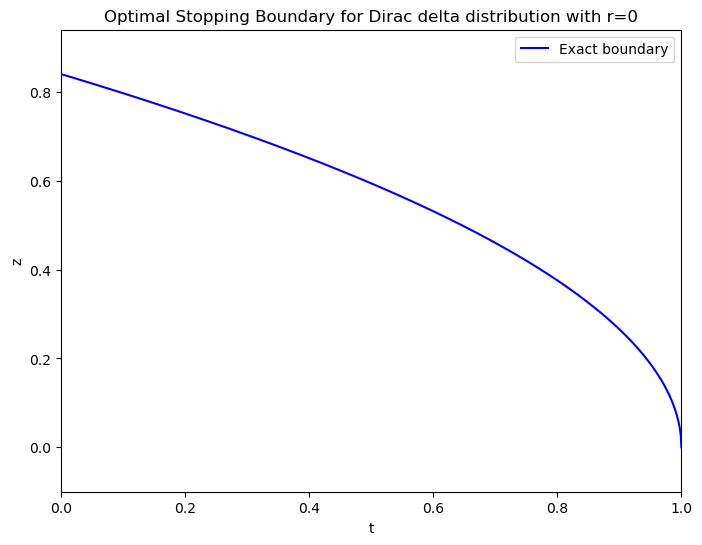

In [3]:
# Pinning point
r = 0

# t mesh
mesh = 1000
t_mesh = np.linspace(0, 1, mesh)

# Boundary
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
plt.xlabel("t")
plt.ylabel("z")
plt.title(f"Optimal Stopping Boundary for Dirac delta distribution with r={r}")
plt.legend()
plt.xlim(0, 1)
plt.ylim(np.min(exact_boundary)-0.1, np.max(exact_boundary)+0.1)
plt.show()

# Theoretical optimal stopping boundary for a Normal distribution with standard deviation lower than 1

## f_t(u) visualization

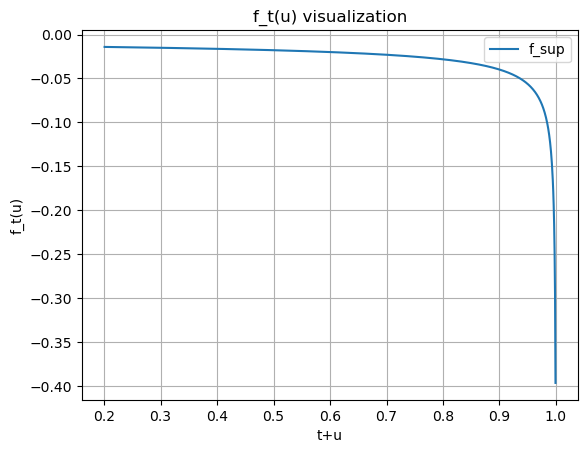

In [4]:
# Parameters
m = 0
gamma = 1/100
t = 0.2
b_t = m/(1-gamma**2)

# t+u mesh
eval_mesh = np.linspace(t, 1, 1000)[:-1]
u = np.diff(eval_mesh)
b_tu = np.full_like(eval_mesh[1:], b_t)

# f_t(u)
f_sup = f_t_sup(m, gamma, t, b_t, u, eval_mesh[1:], b_tu, pers = "Eduardo")

# Plotting
plt.plot(eval_mesh[1:], f_sup, label="f_sup")
plt.xlabel("t+u")
plt.ylabel("f_t(u)")
plt.title("f_t(u) visualization")
plt.grid(True)
plt.legend()
plt.show()

## h(t,z) when gamma tends to 0

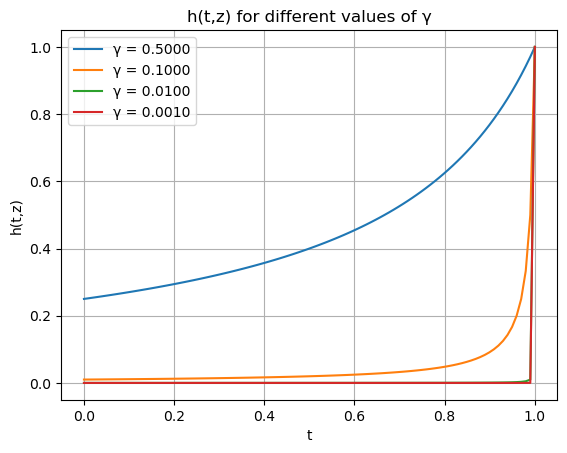

In [5]:
# t mesh and z
mesh = 100
t_mesh = np.linspace(0, 1, mesh)
z = 1

# Parameters
m = 0
gammas = np.array([1/2, 1/10, 1/100, 1/1000])

# Plotting
plt.figure()
for gamma in gammas:
    c1 = (1 - gamma**2)
    h = lambda t: (z * gamma**2 + m * (1 - t)) / (1 - t * c1)
    h_vals = h(t_mesh)
    plt.plot(t_mesh, h_vals, label=f"γ = {gamma:.4f}")
    
plt.xlabel("t")
plt.ylabel("h(t,z)")
plt.title("h(t,z) for different values of γ")
plt.legend()
plt.grid(True)
plt.show()

## Boundary step by step Abel

0 1.0


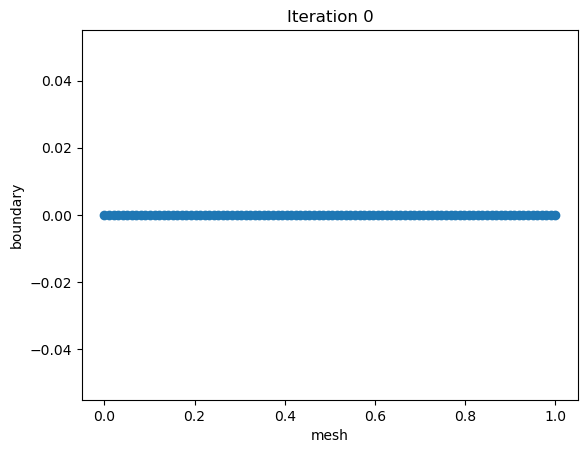

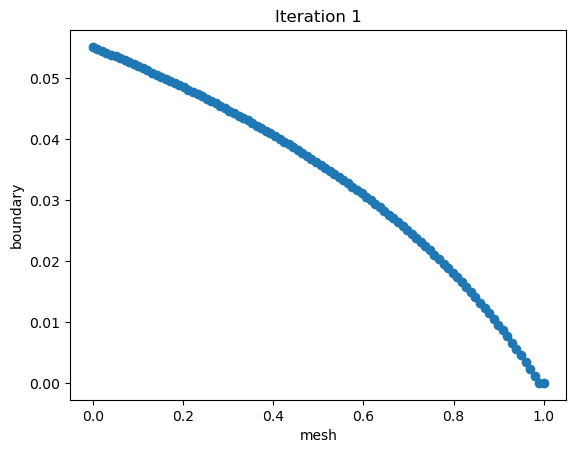

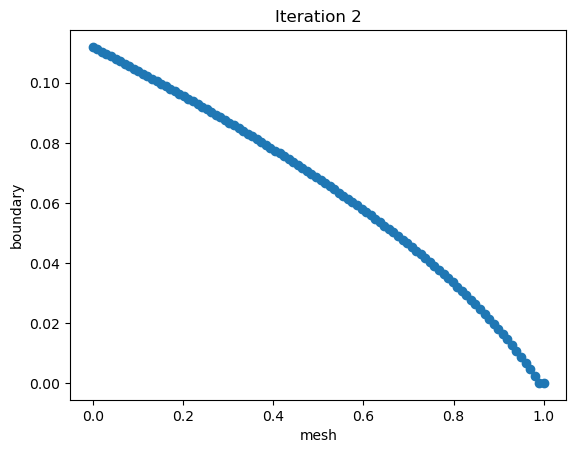

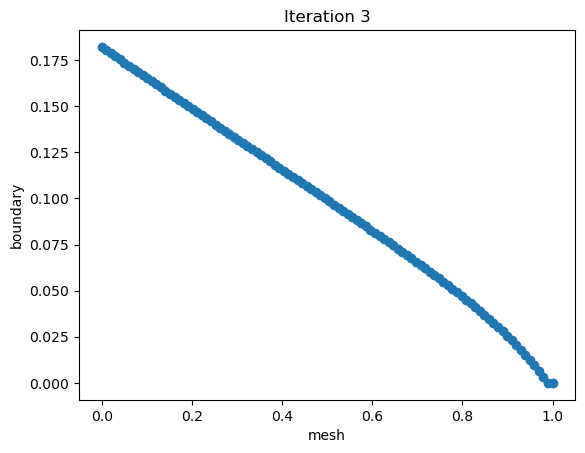

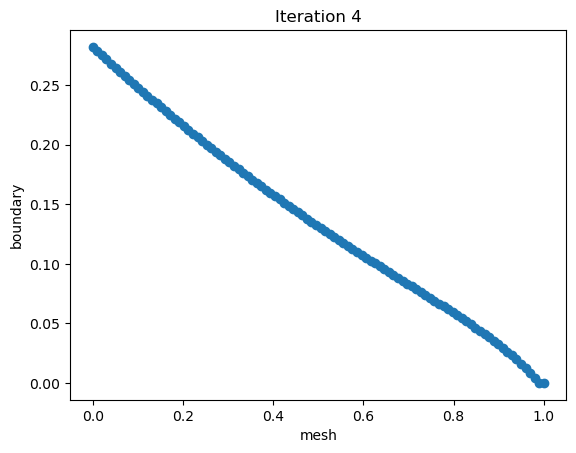

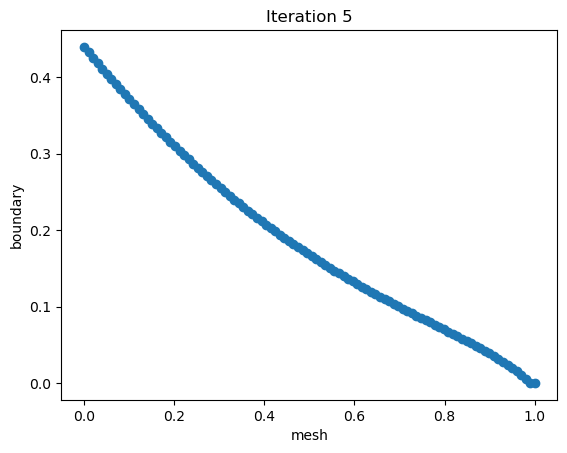

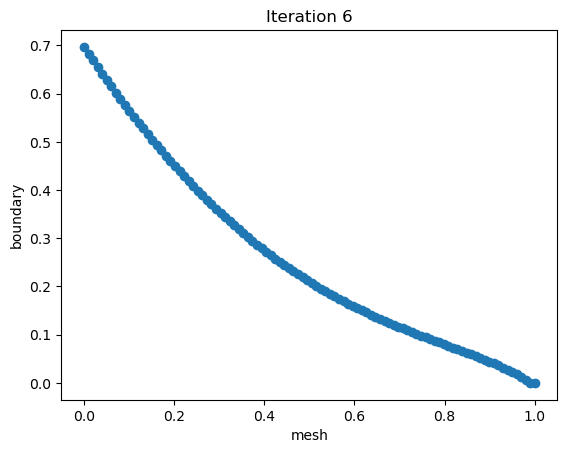

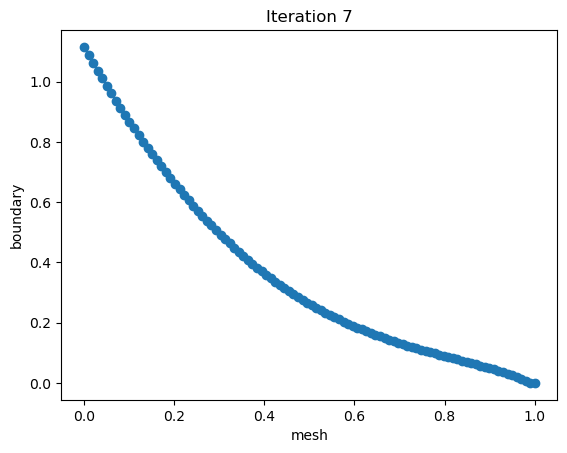

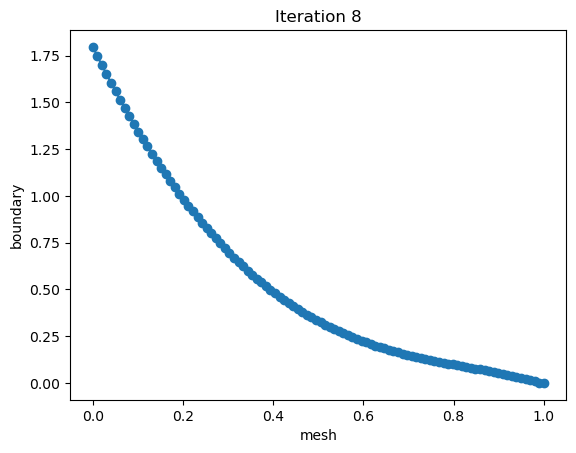

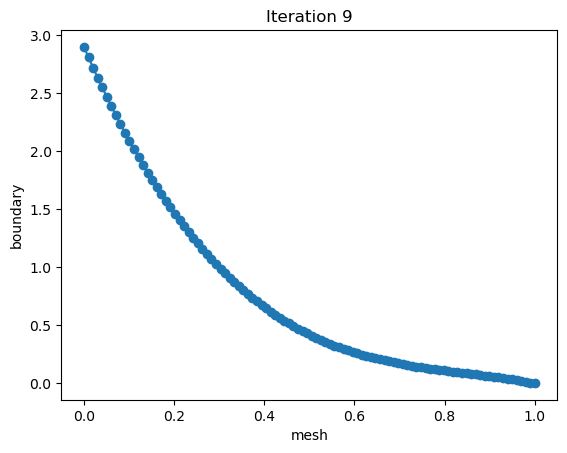

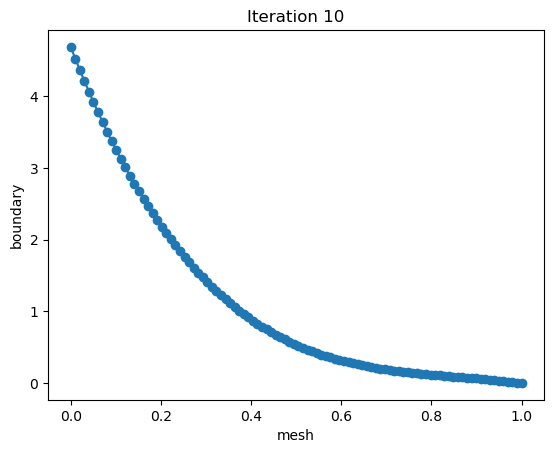

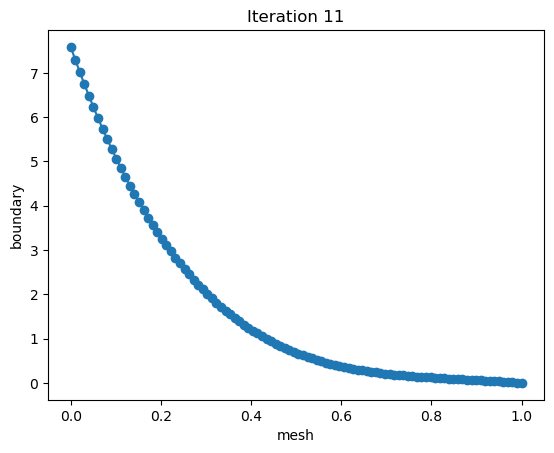

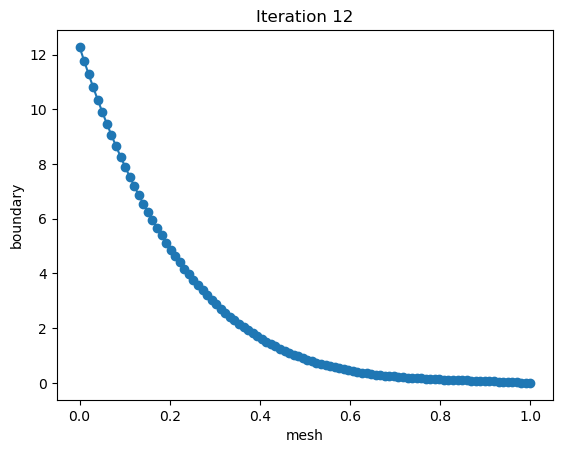

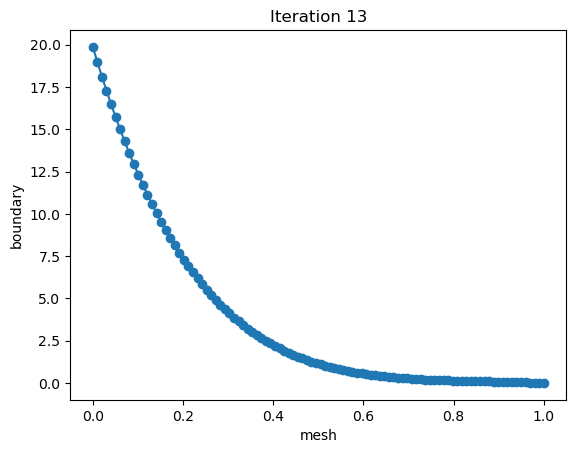

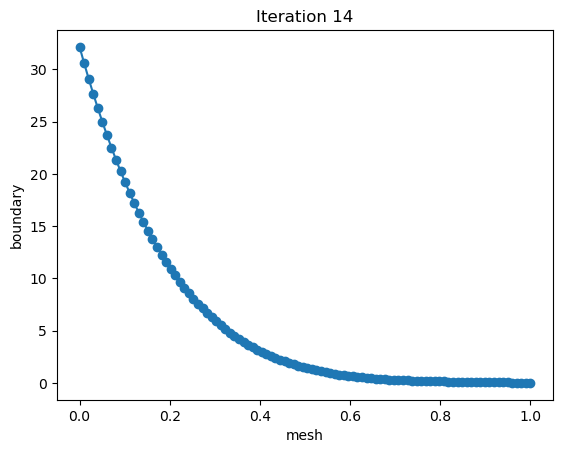

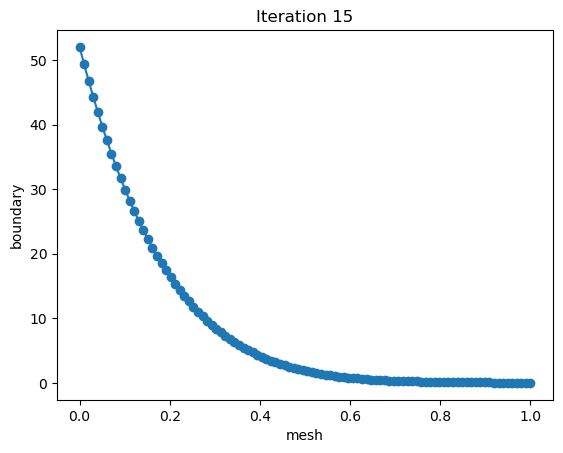

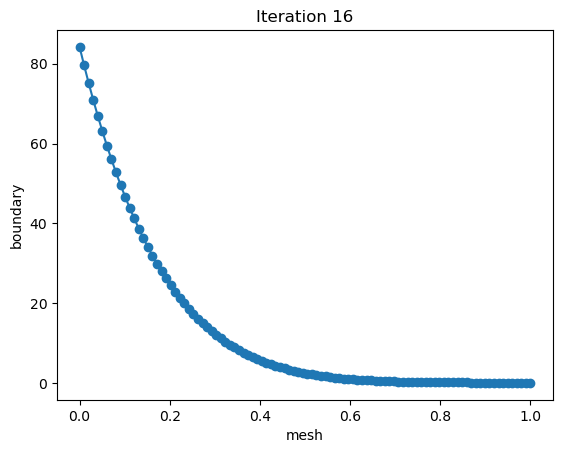

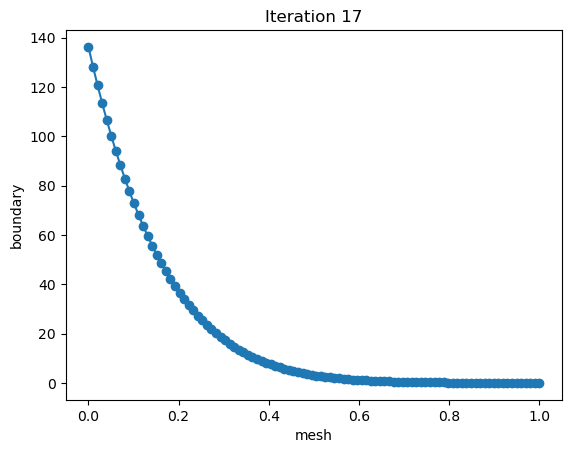

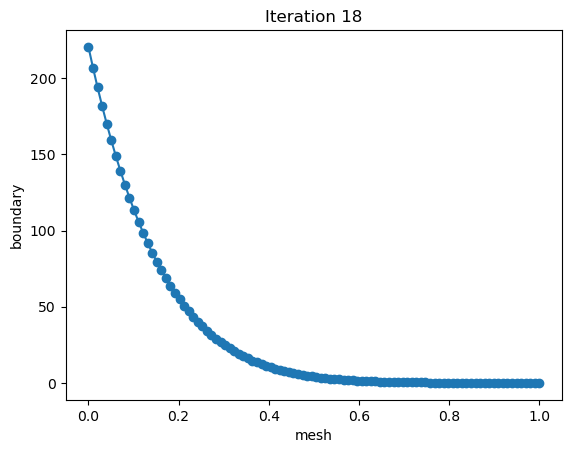

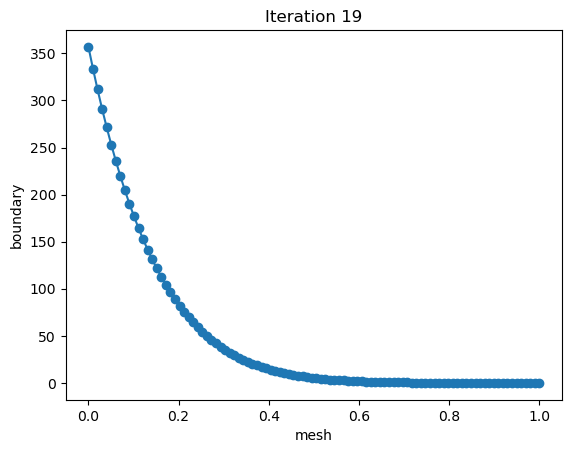

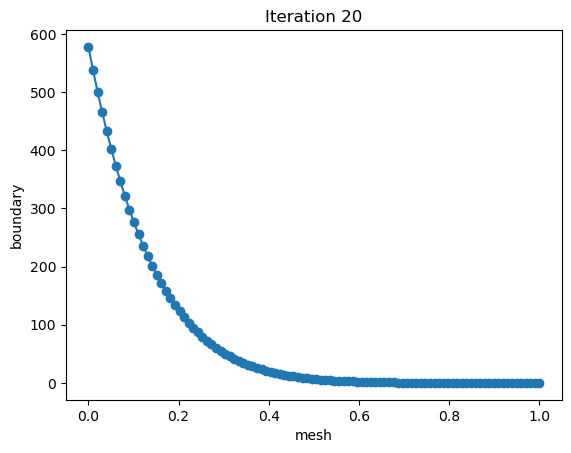

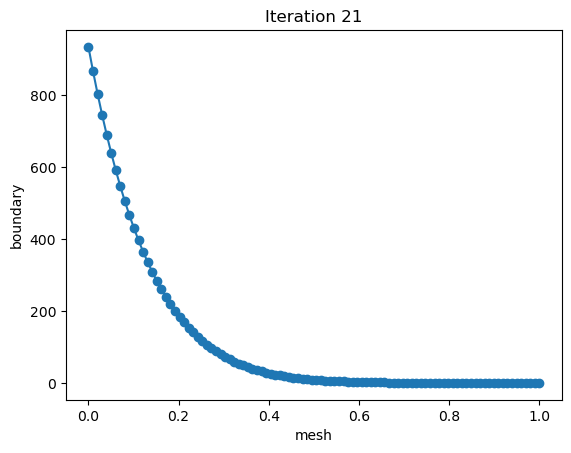

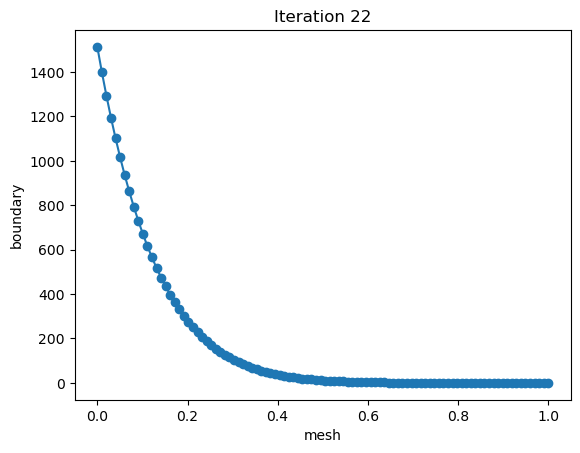

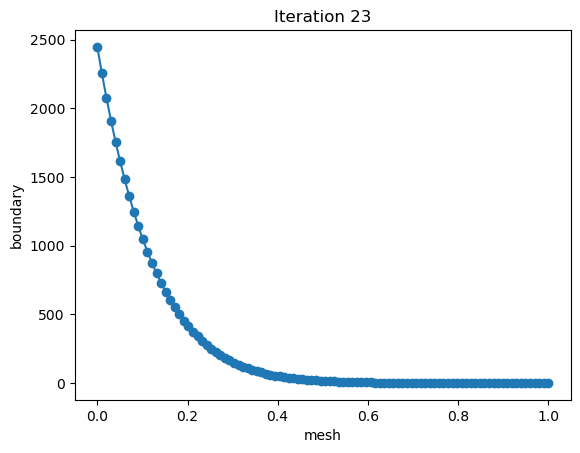

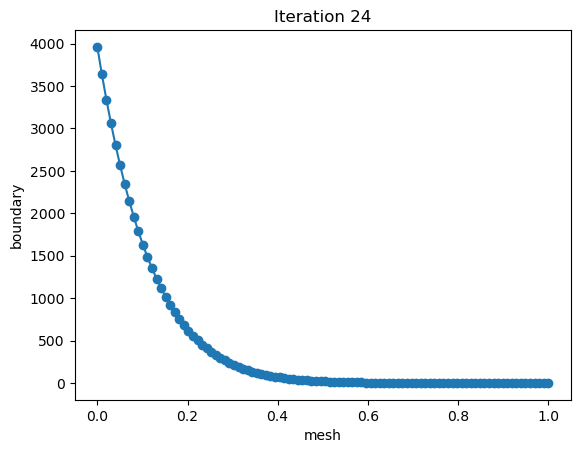

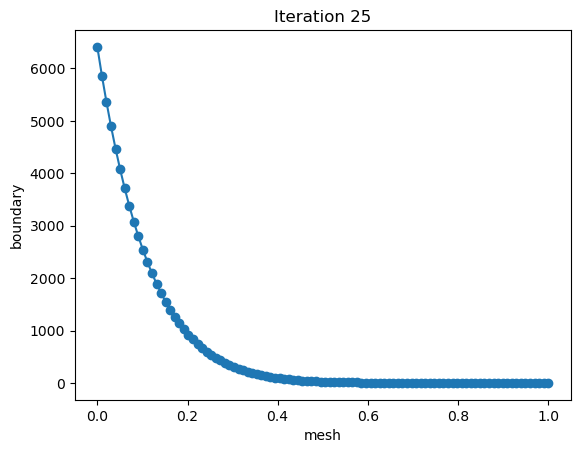

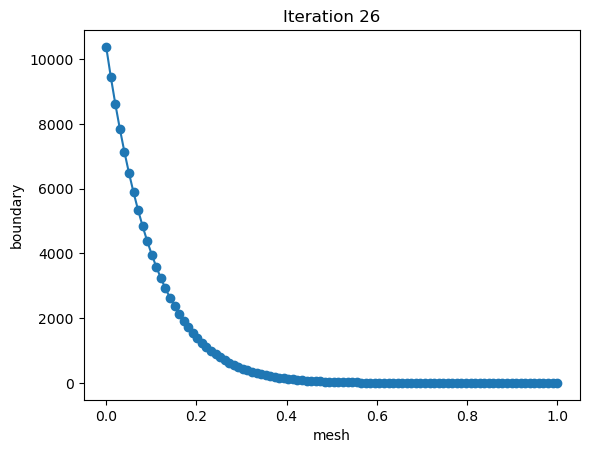

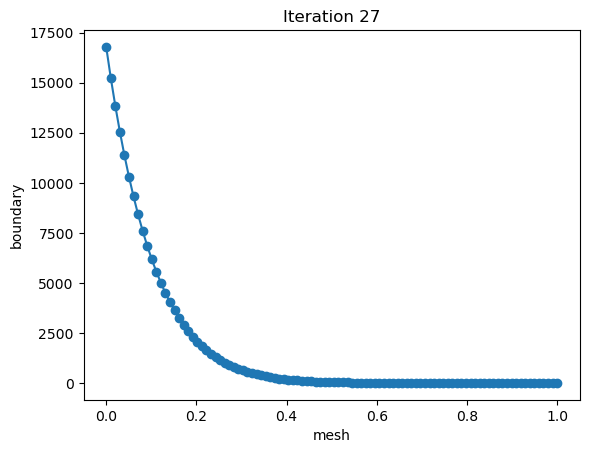

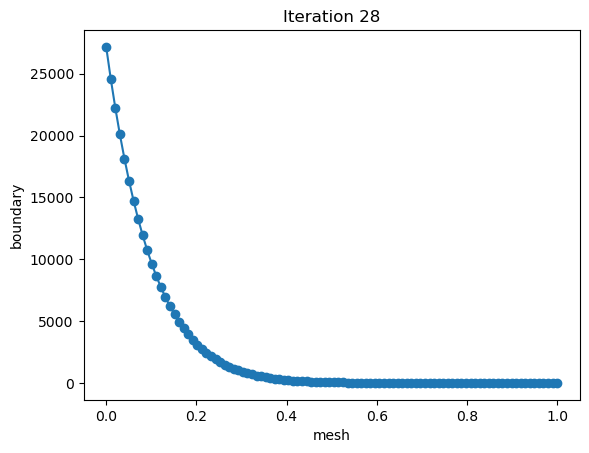

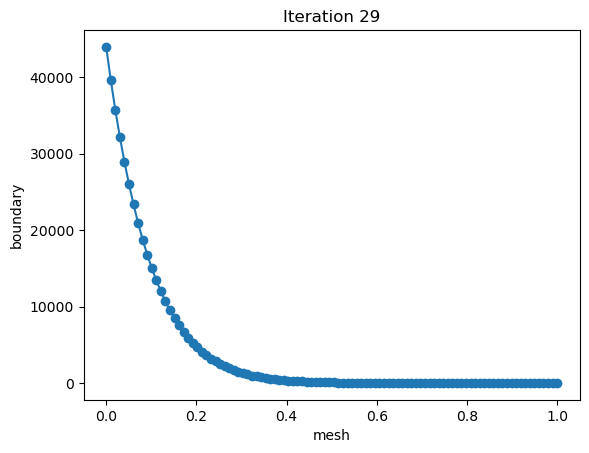

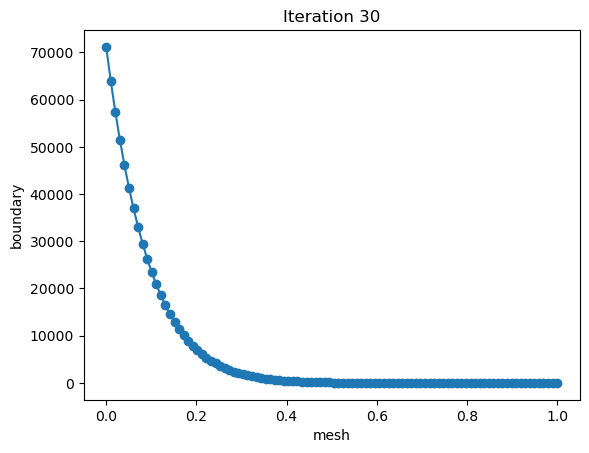

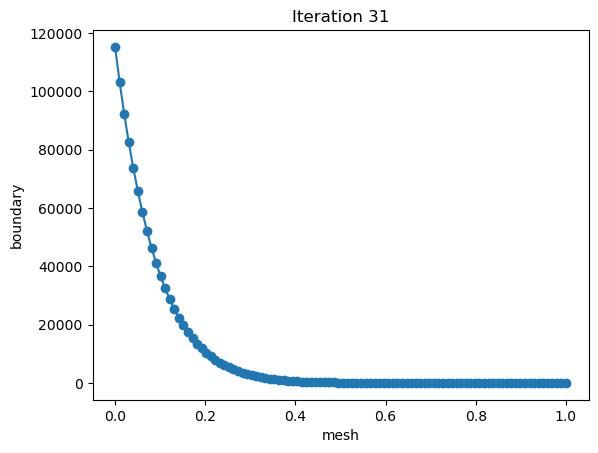

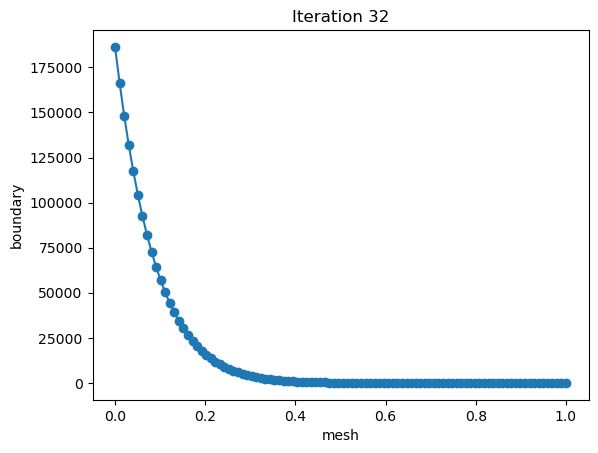

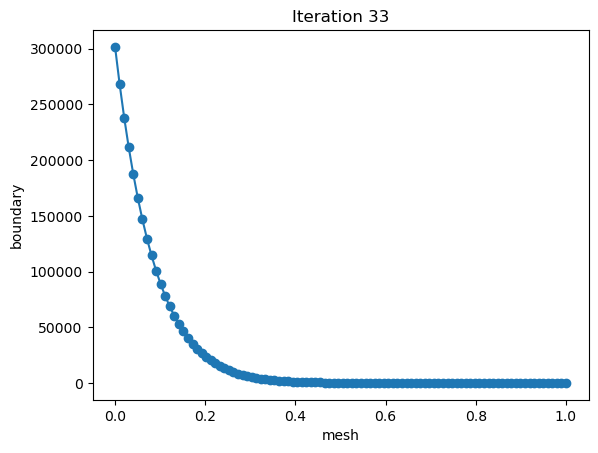

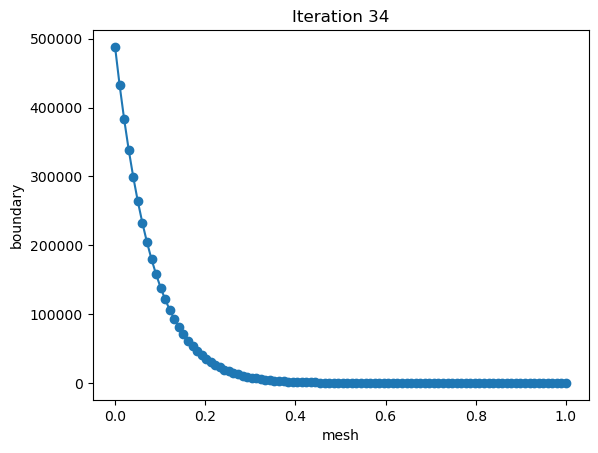

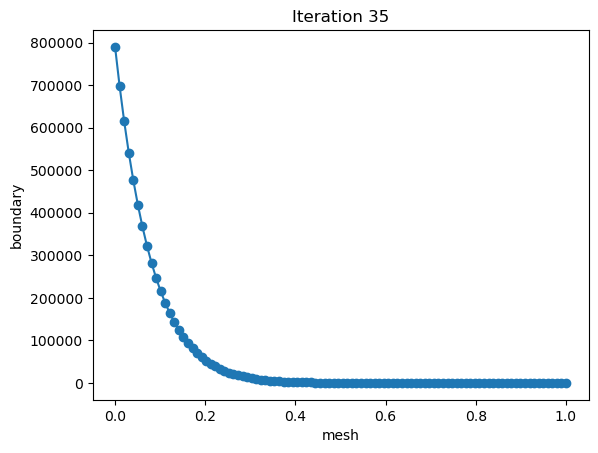

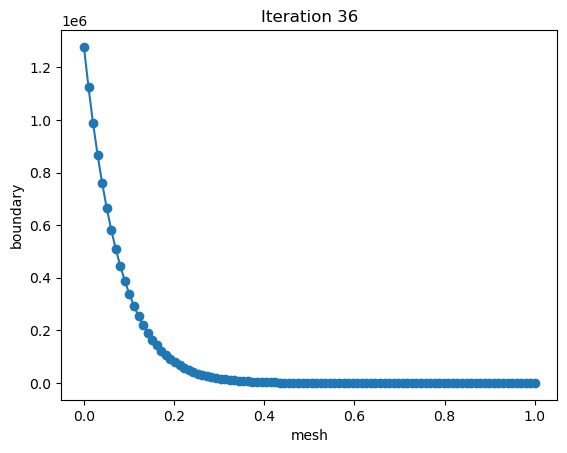

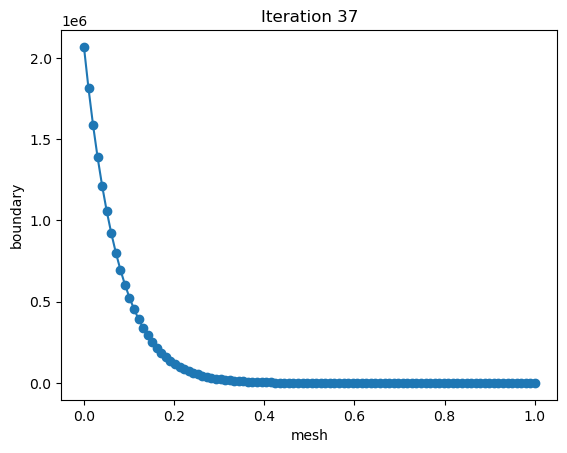

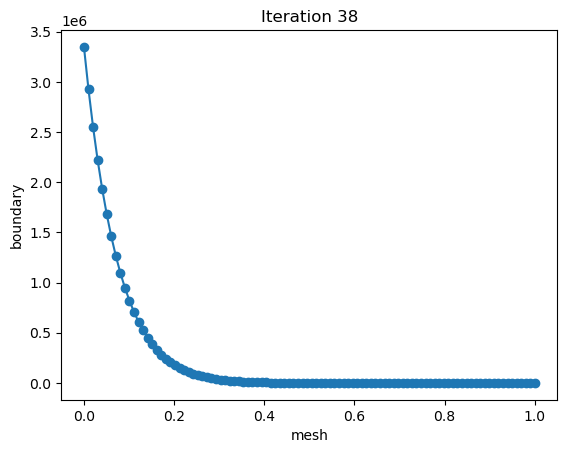

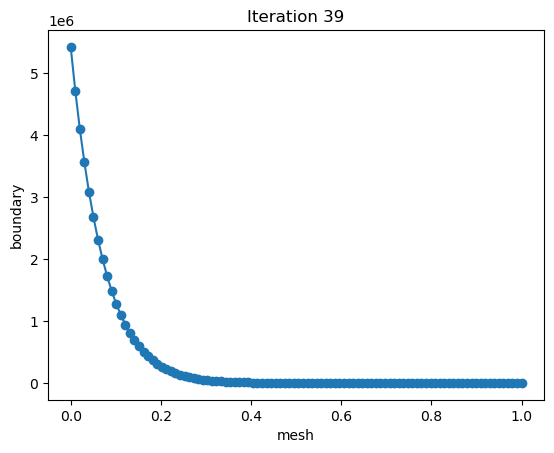

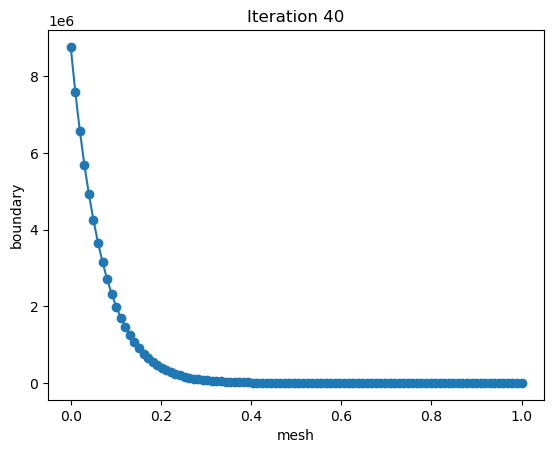

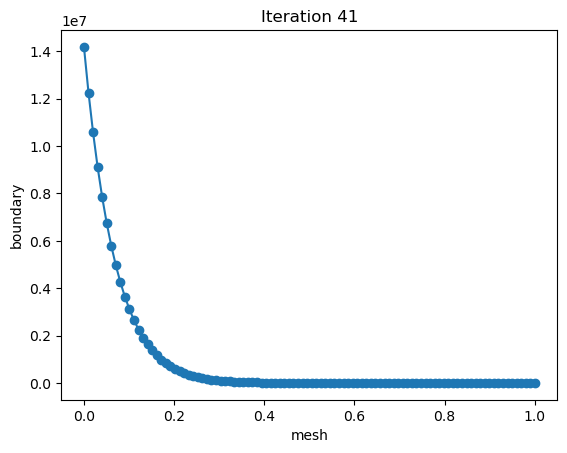

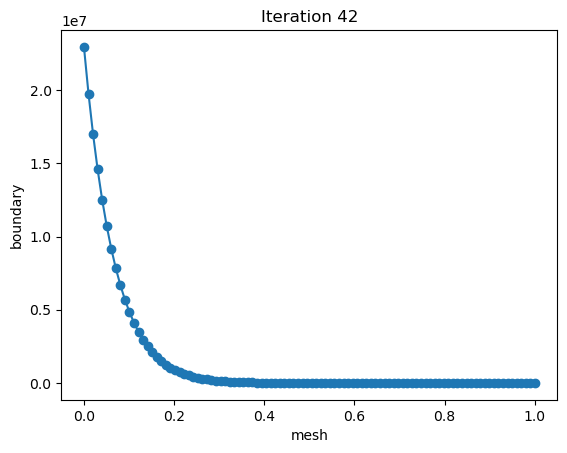

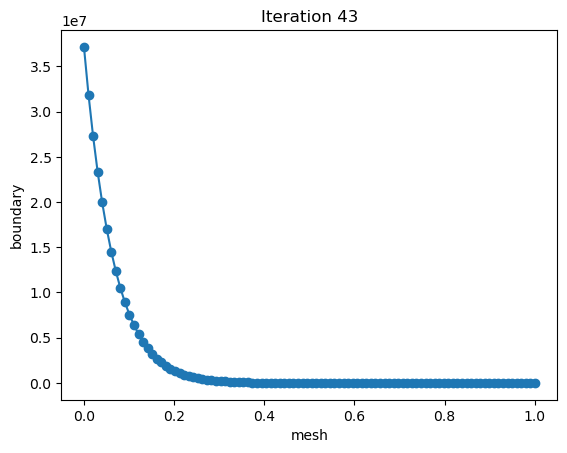

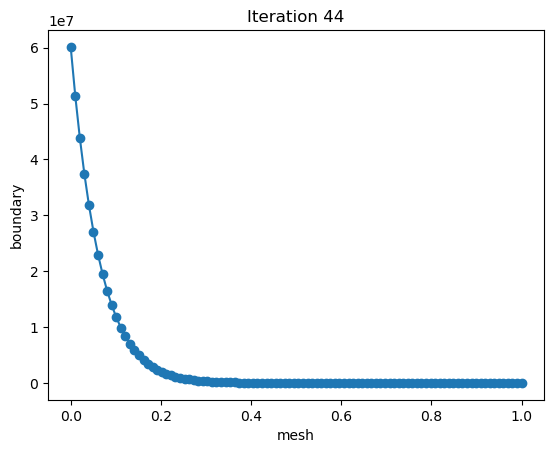

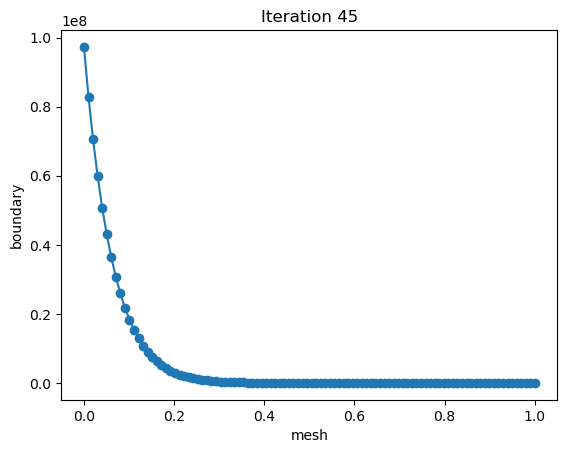

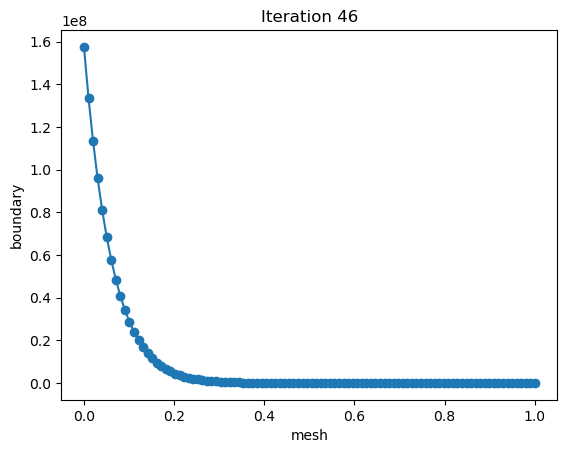

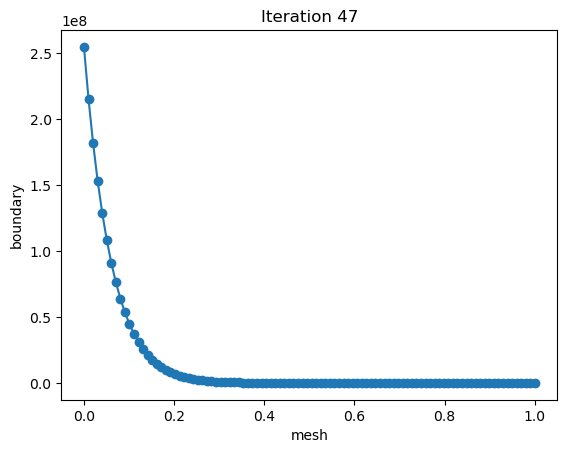

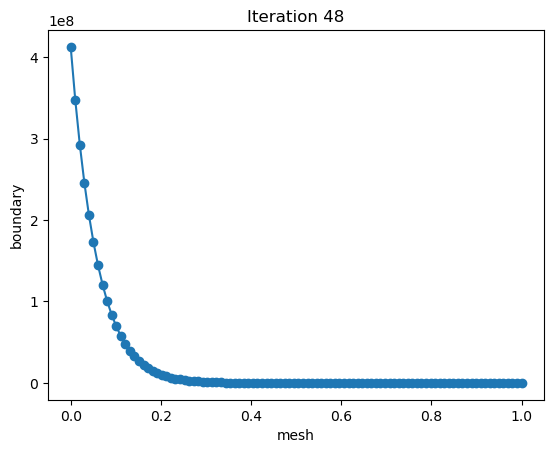

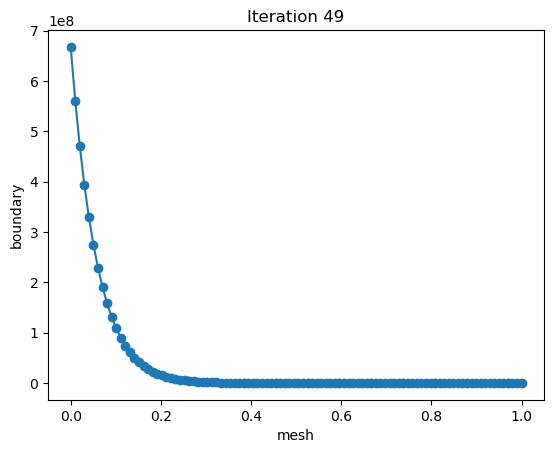

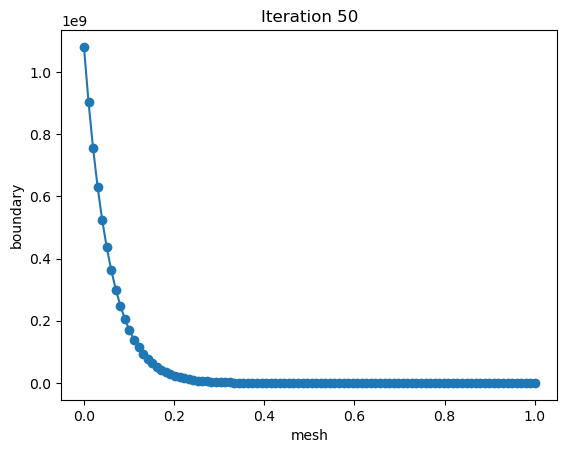

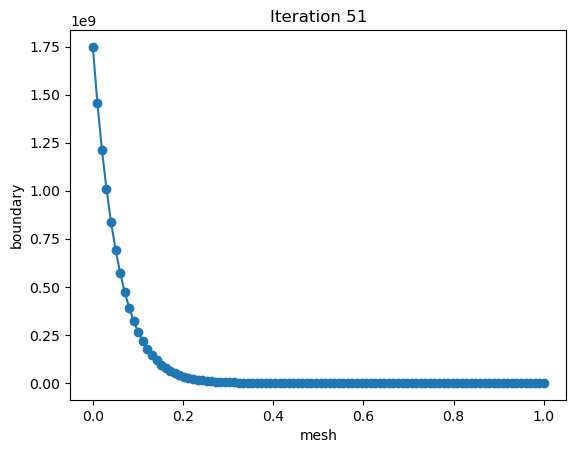

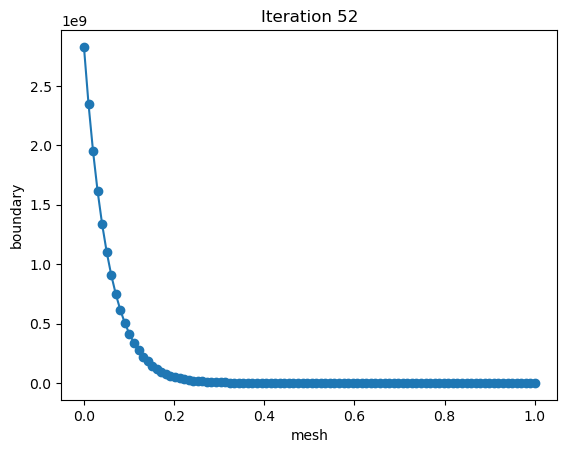

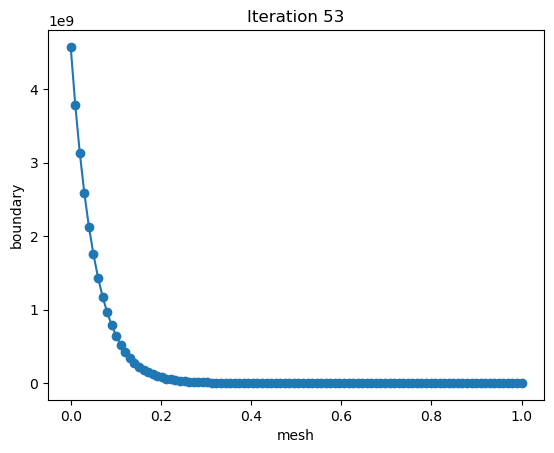

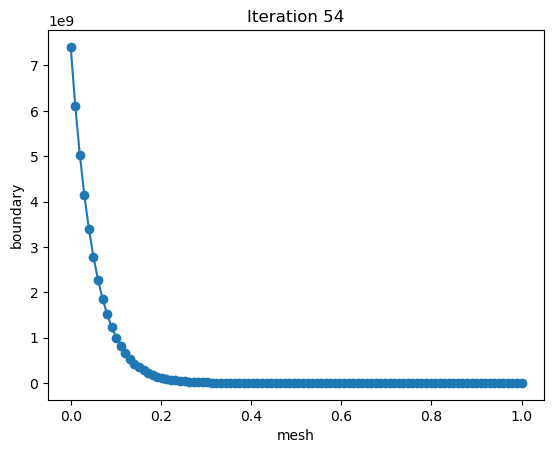

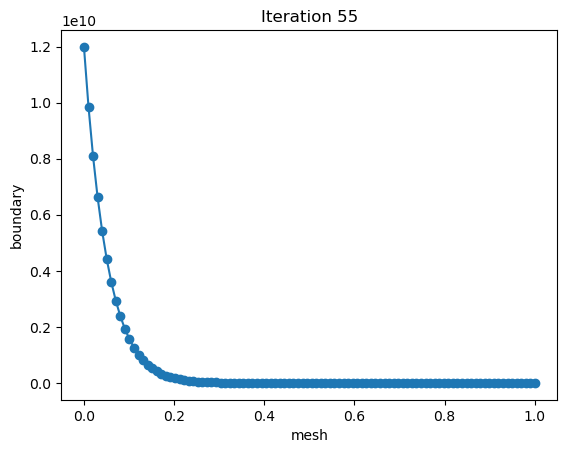

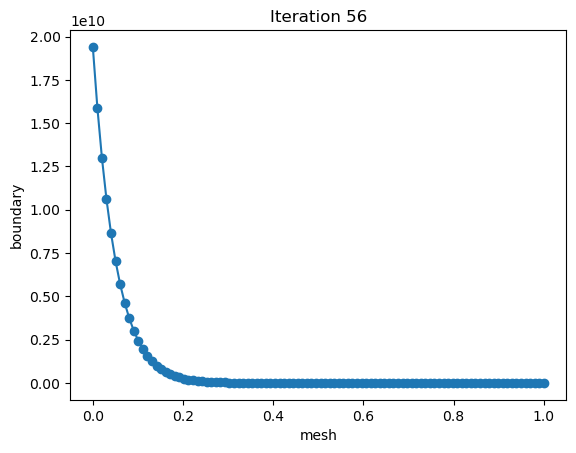

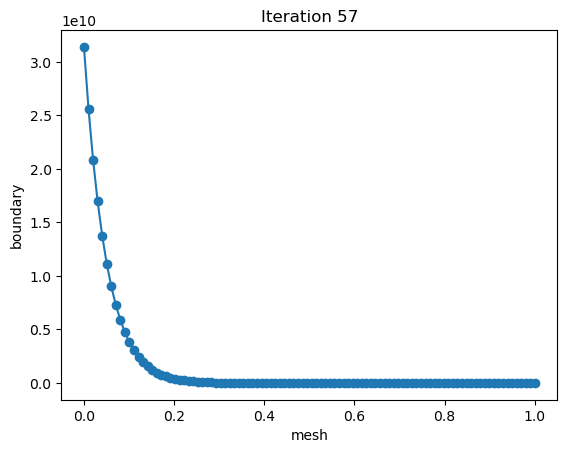

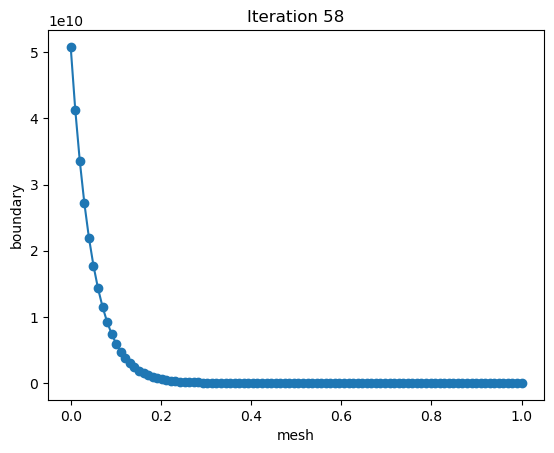

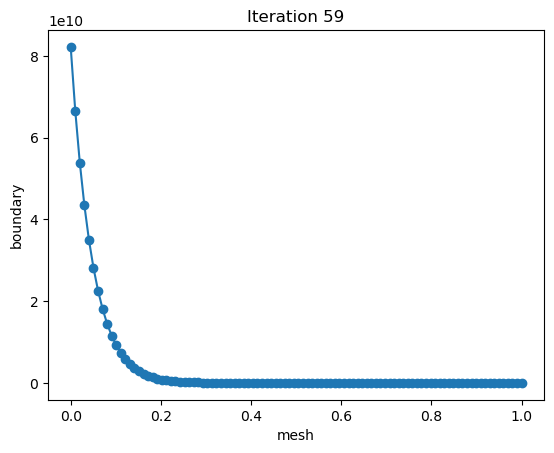

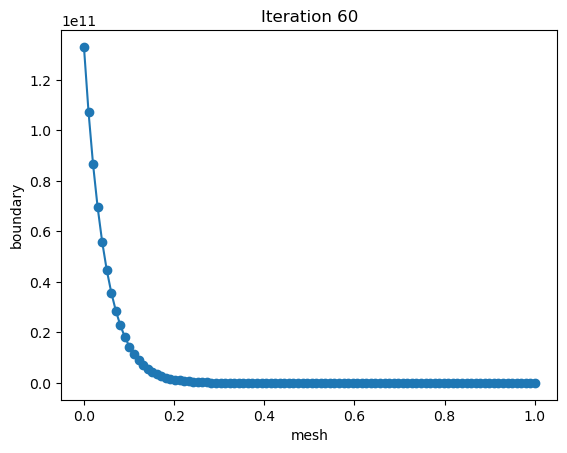

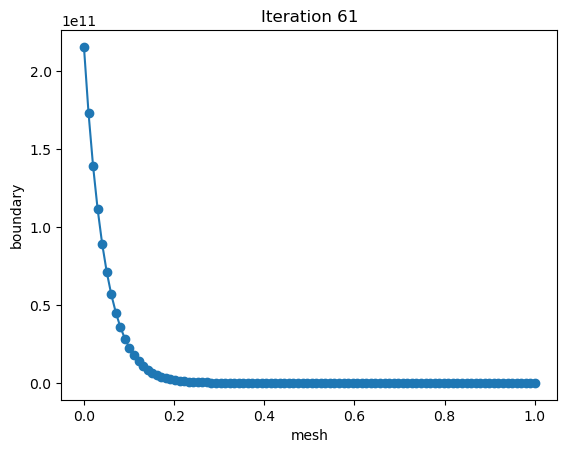

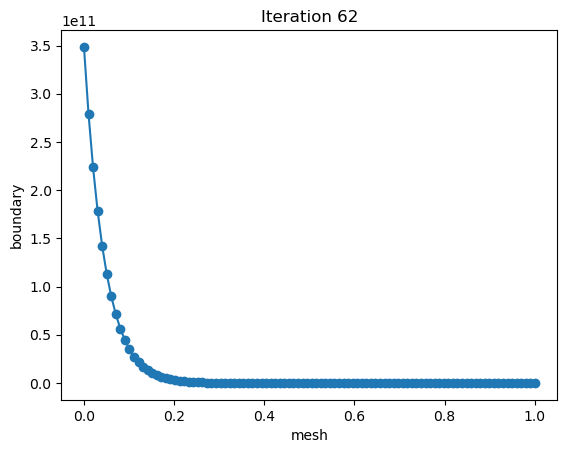

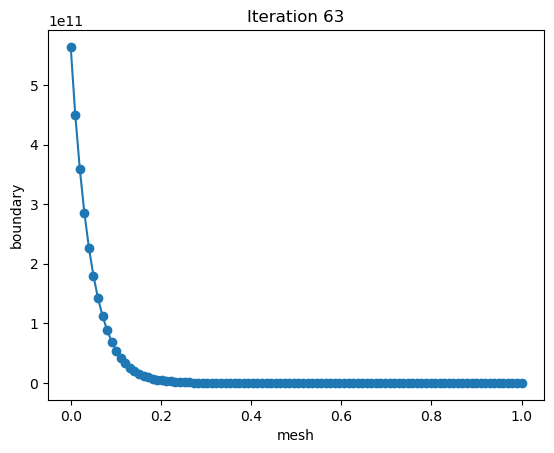

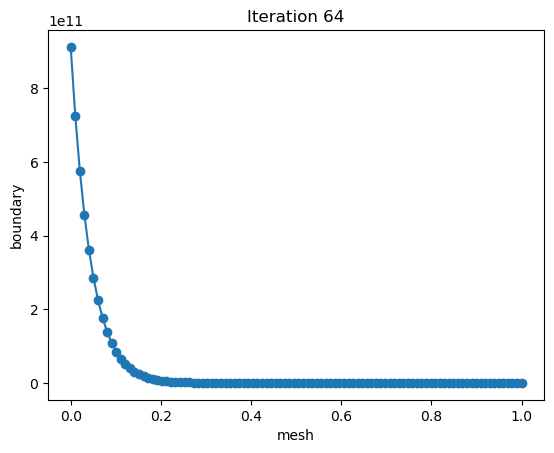

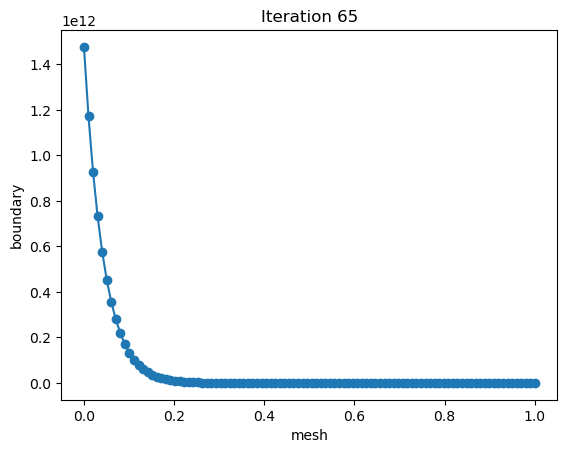

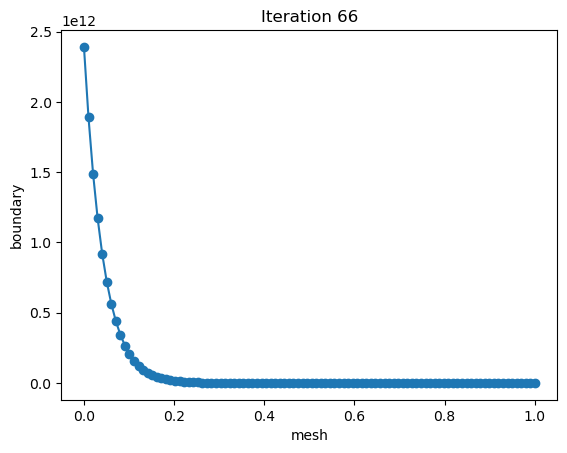

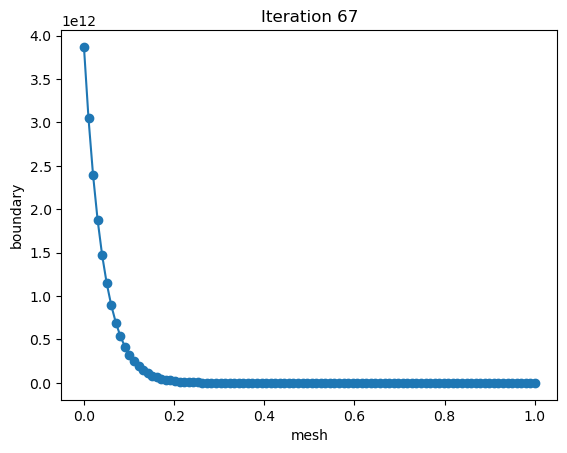

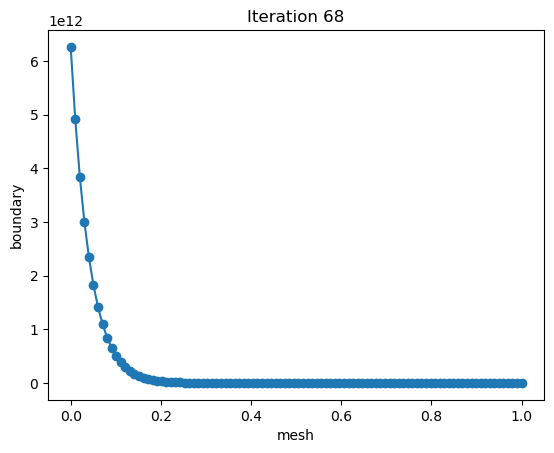

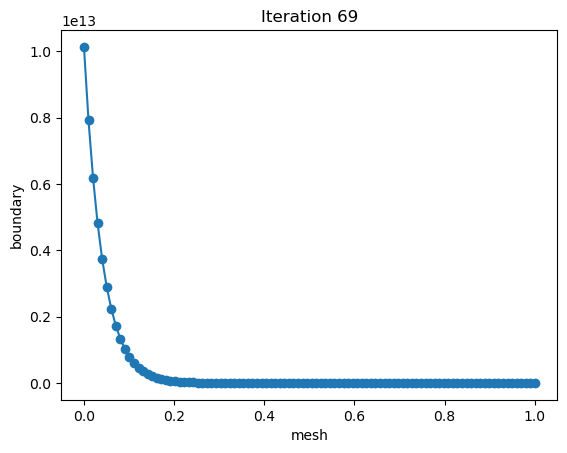

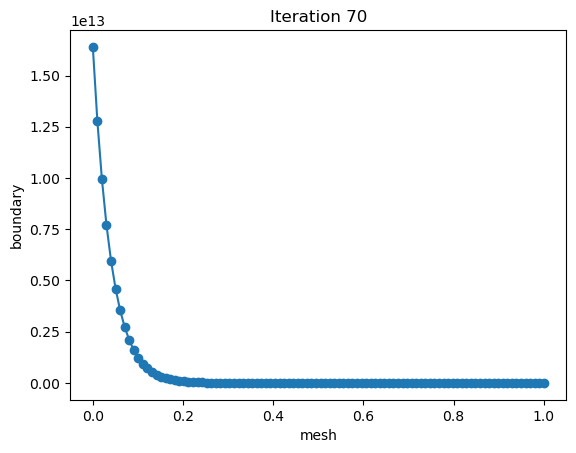

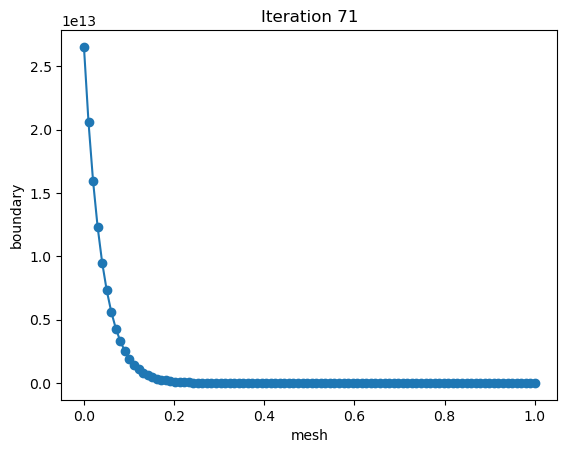

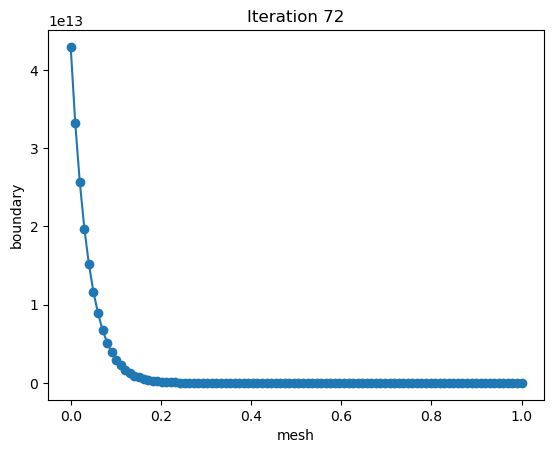

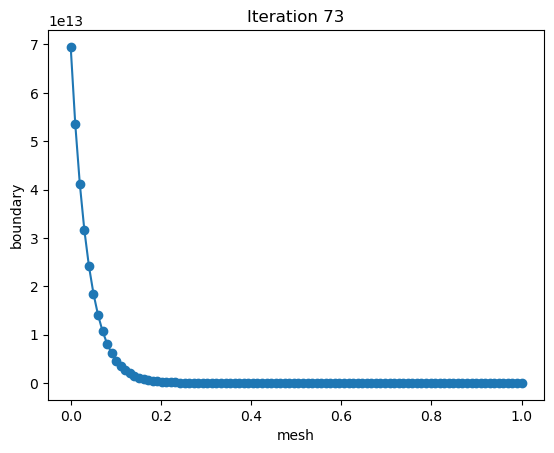

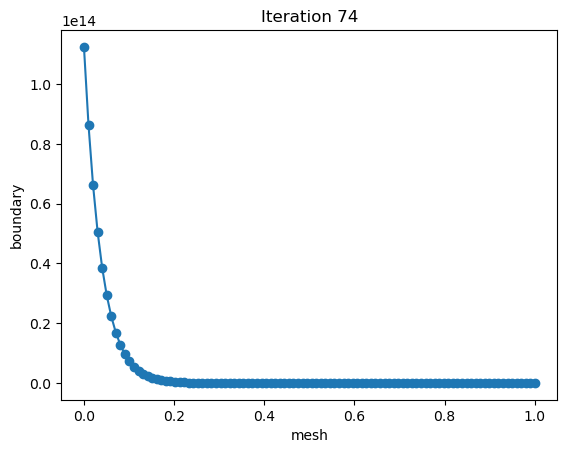

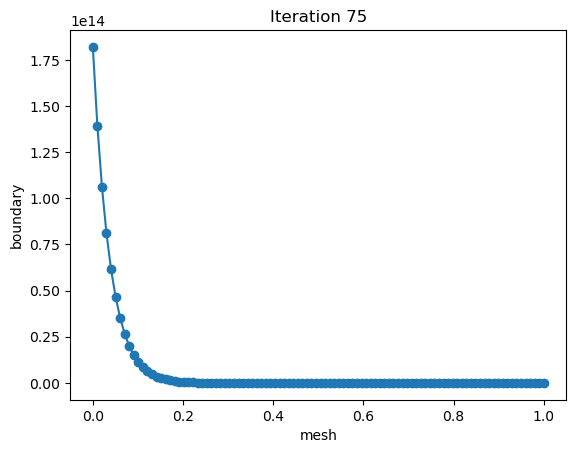

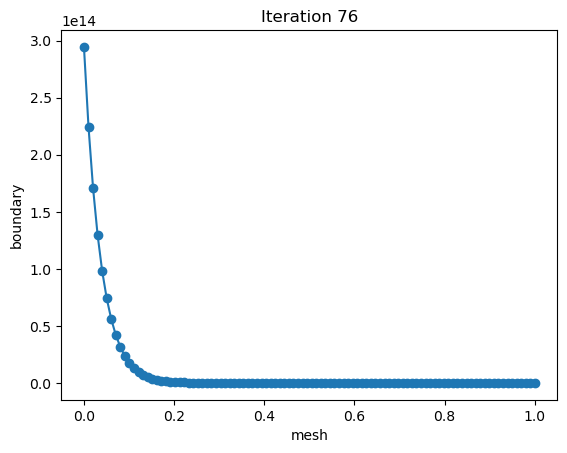

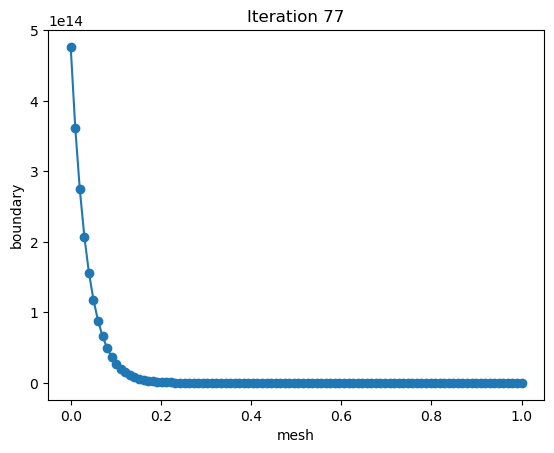

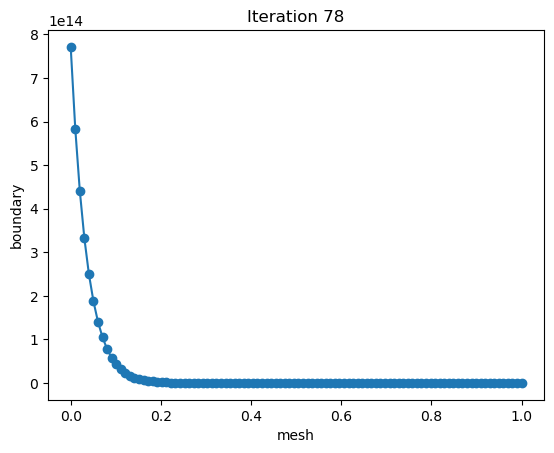

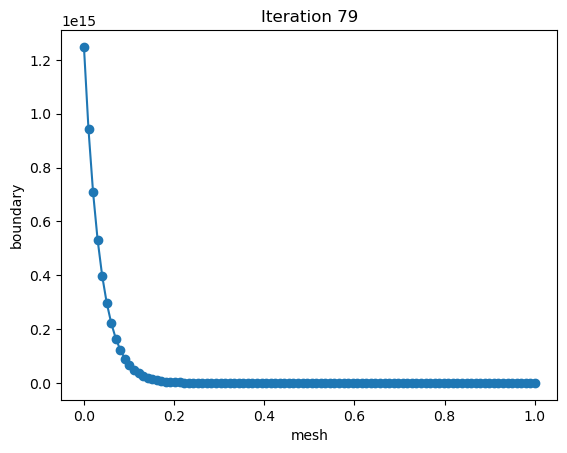

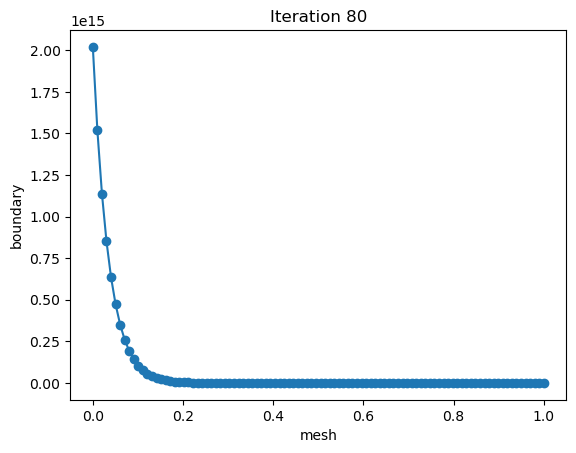

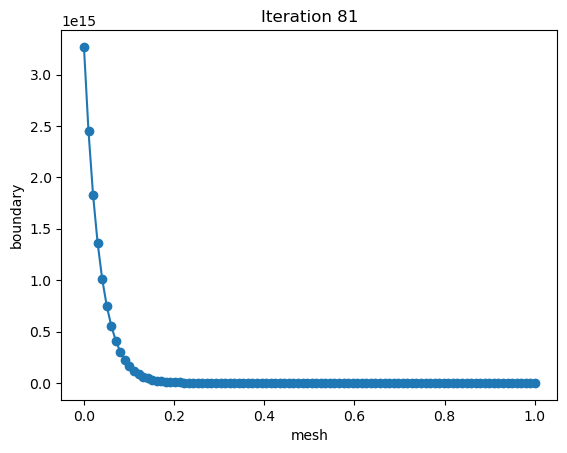

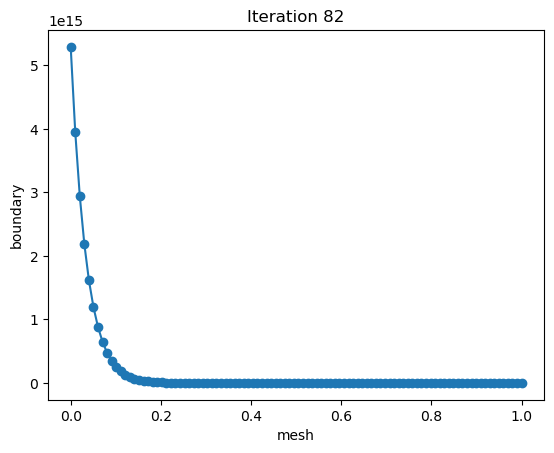

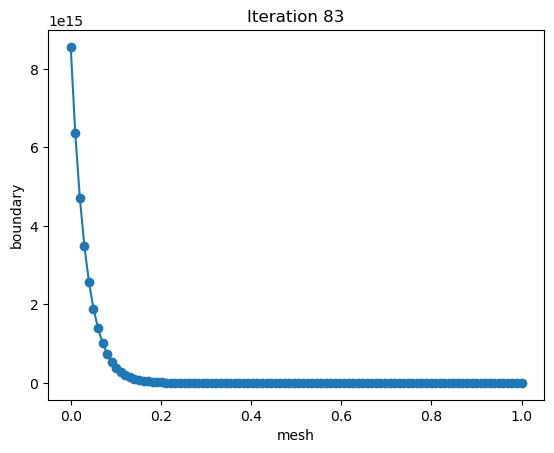

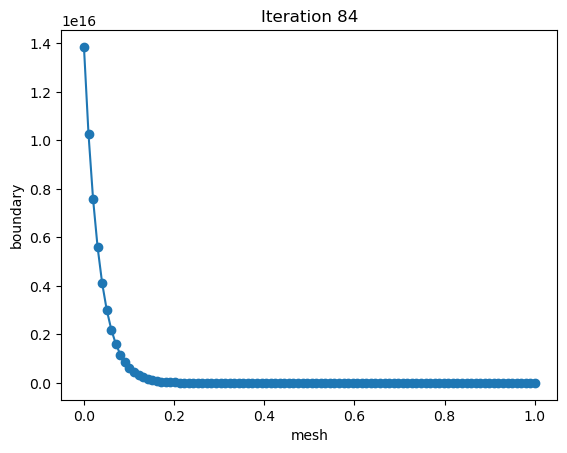

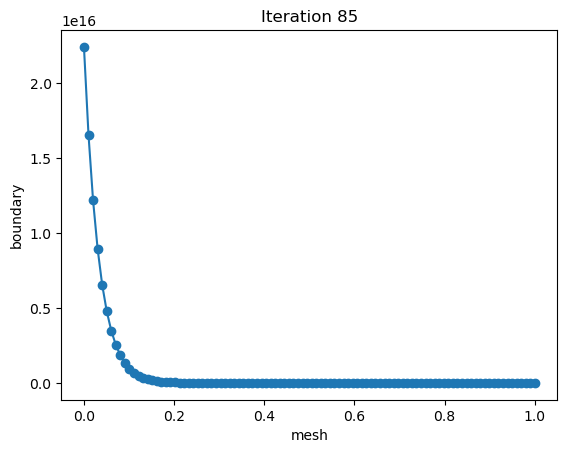

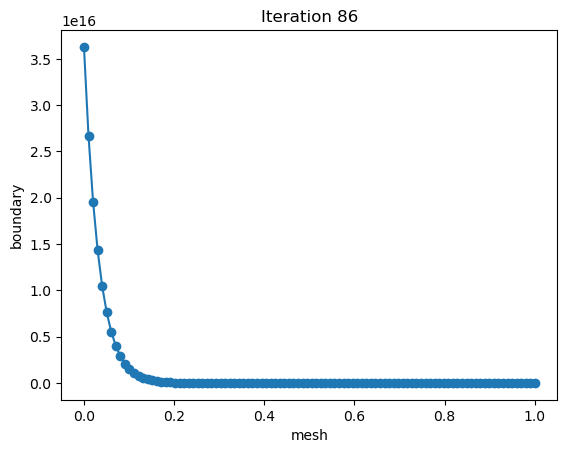

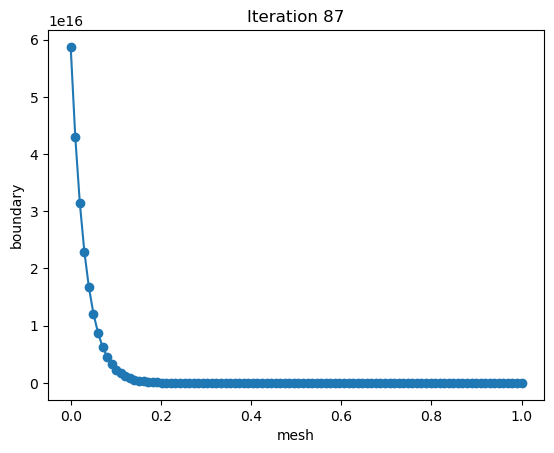

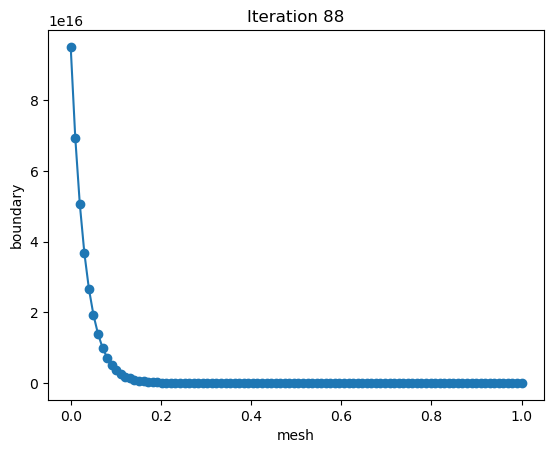

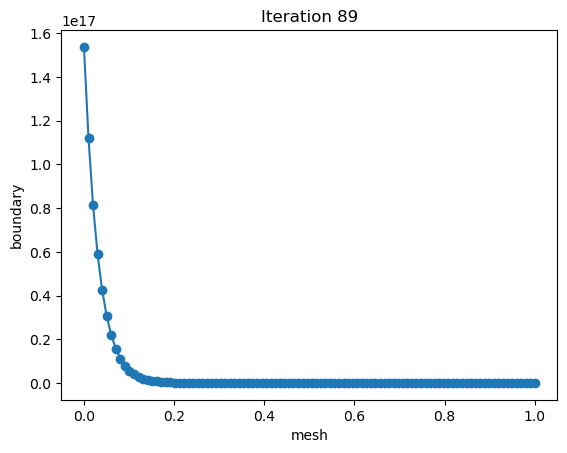

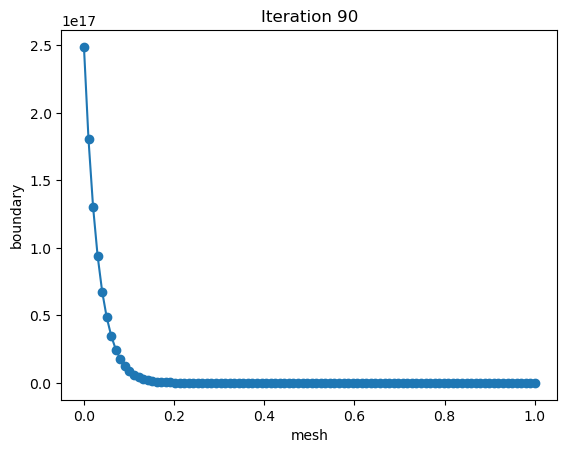

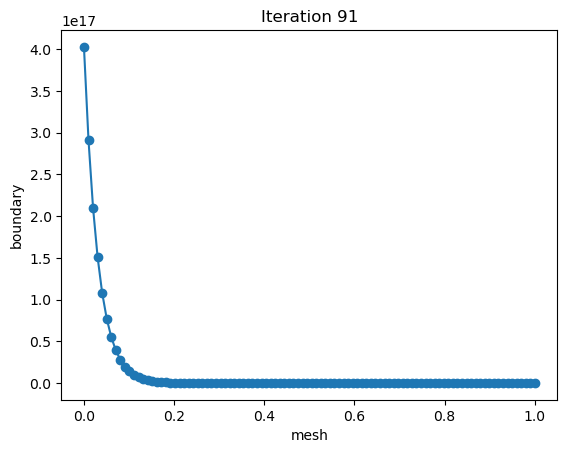

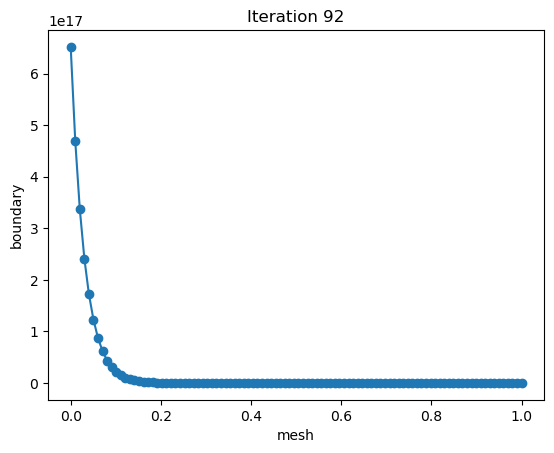

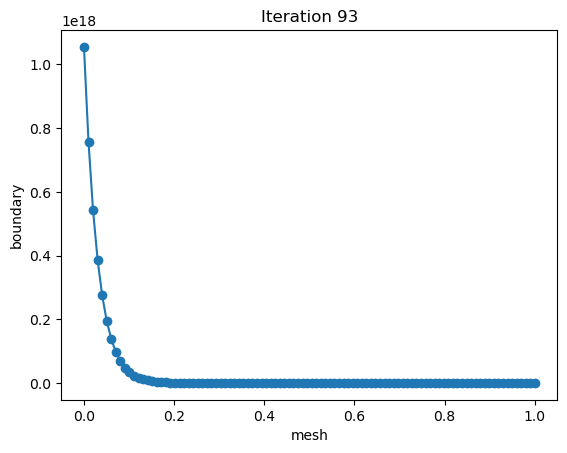

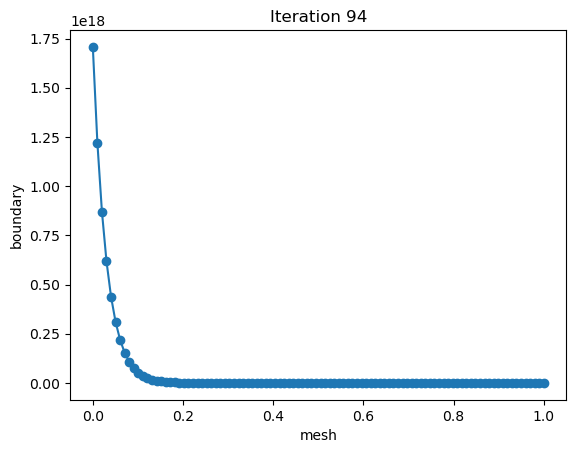

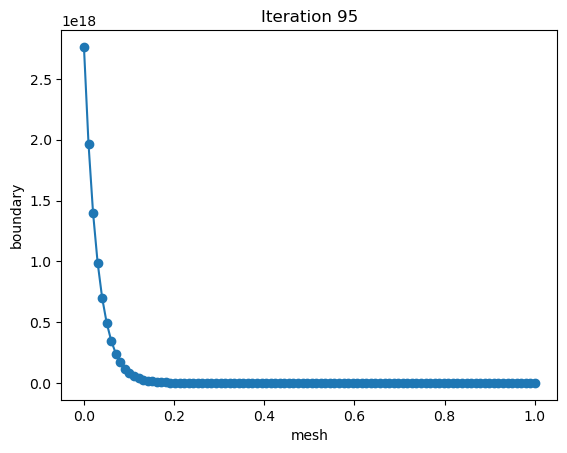

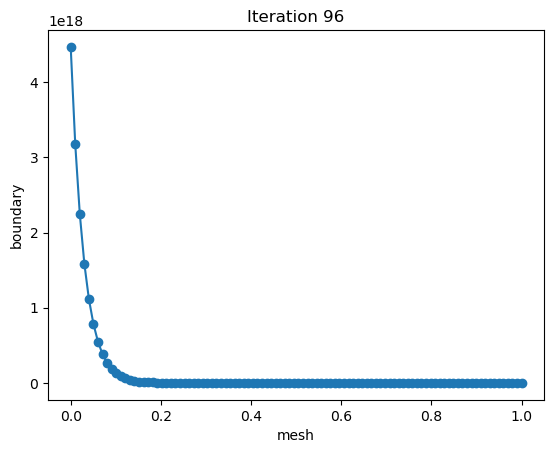

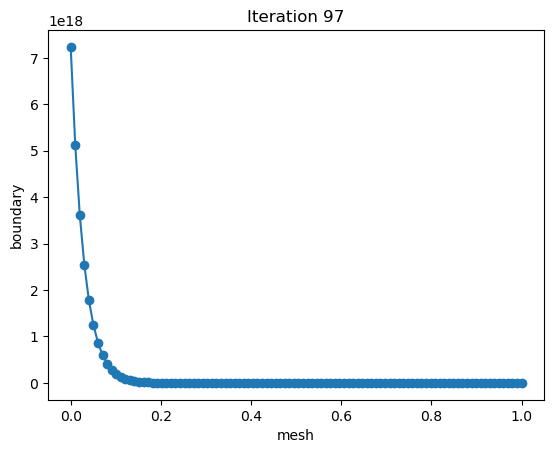

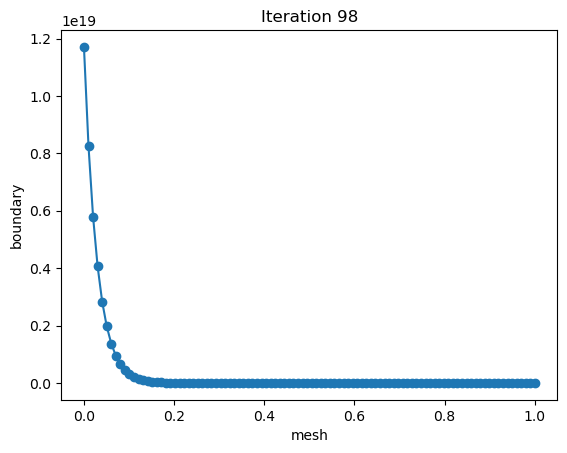

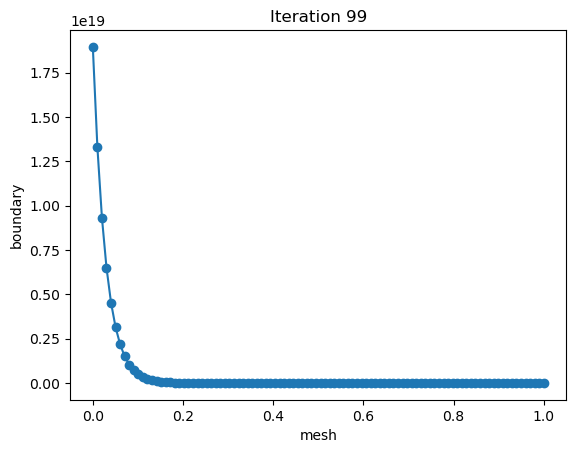

array([3.06672850e+19, 2.14590588e+19, 1.49689244e+19, 1.04086952e+19,
       7.21454028e+18, 4.98434737e+18, 3.43222308e+18, 2.35553885e+18,
       1.61113631e+18, 1.09819872e+18, 7.45959579e+17, 5.04910199e+17,
       3.40530445e+17, 2.28833112e+17, 1.53207761e+17, 1.02192544e+17,
       6.79065179e+16, 4.49504969e+16, 2.96390998e+16, 1.94661205e+16,
       1.27336772e+16, 8.29591271e+15, 5.38252495e+15, 3.47772199e+15,
       2.23751407e+15, 1.43342098e+15, 9.14310233e+14, 5.80630520e+14,
       3.67085360e+14, 2.31030620e+14, 1.44737666e+14, 9.02562620e+13,
       5.60184492e+13, 3.46032599e+13, 2.12720556e+13, 1.30131627e+13,
       7.92158067e+12, 4.79812227e+12, 2.89158825e+12, 1.73373567e+12,
       1.03415758e+12, 6.13655545e+11, 3.62221418e+11, 2.12673479e+11,
       1.24199965e+11, 7.21404450e+10, 4.16741665e+10, 2.39424608e+10,
       1.36794628e+10, 7.77238305e+09, 4.39149965e+09, 2.46737974e+09,
       1.37853334e+09, 7.65866968e+08, 4.23101145e+08, 2.32430775e+08,
      

In [6]:
# t mesh
mesh = 100
t_mesh = np.linspace(0, 1, mesh)

# Boundary
normal_boundary_ABEL_step_by_step(mesh = t_mesh, m = 0, gamma = 1/2, tol = 1e-6, max_iter=100)

## Boundary step by step Eduardo

0 1.0


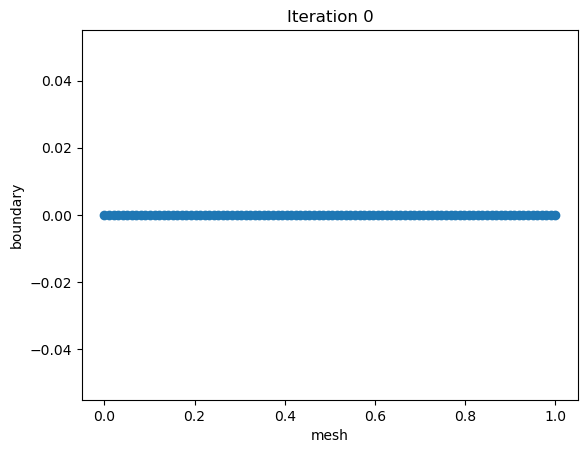

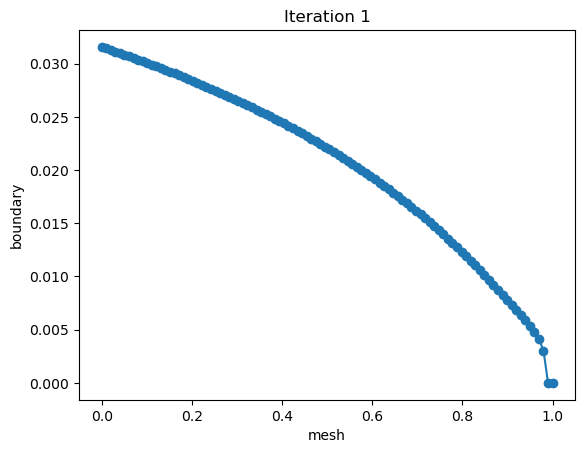

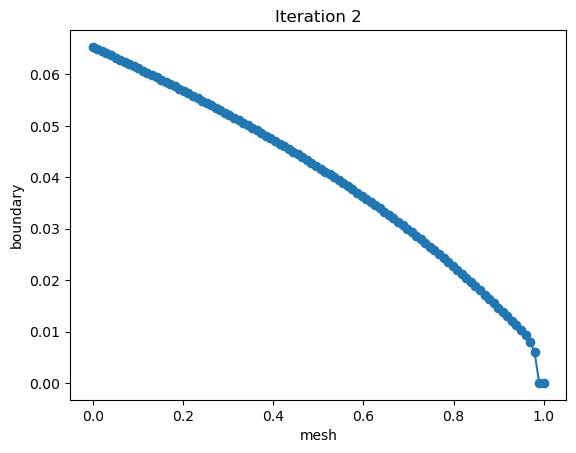

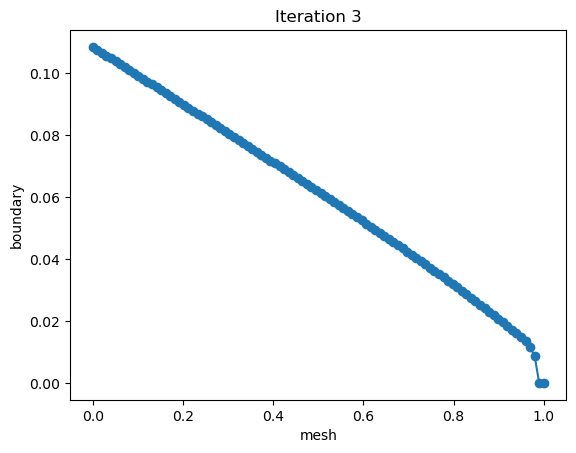

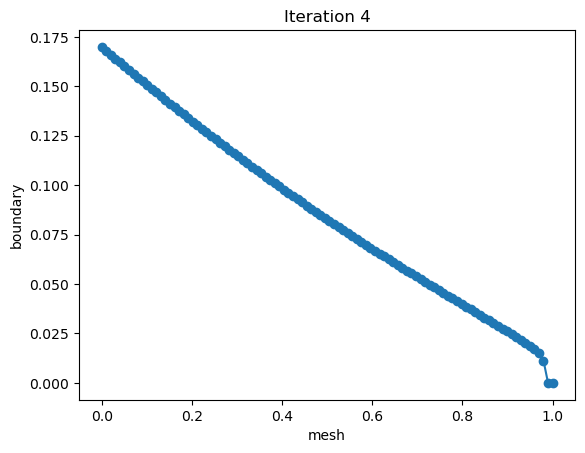

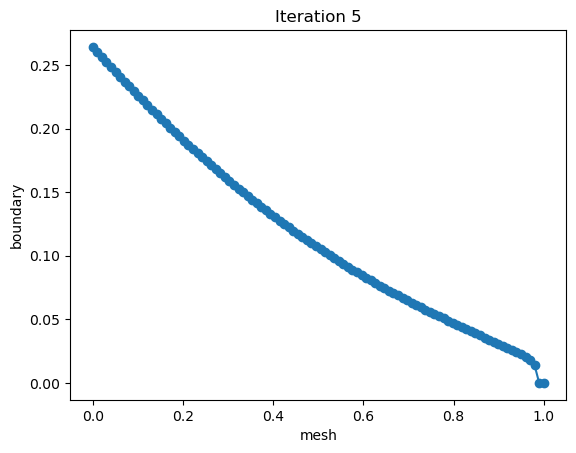

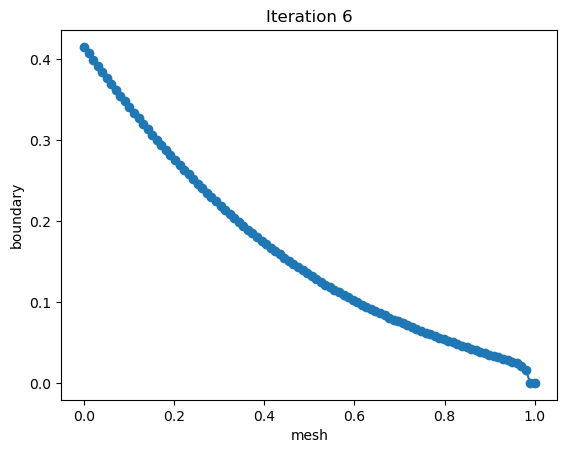

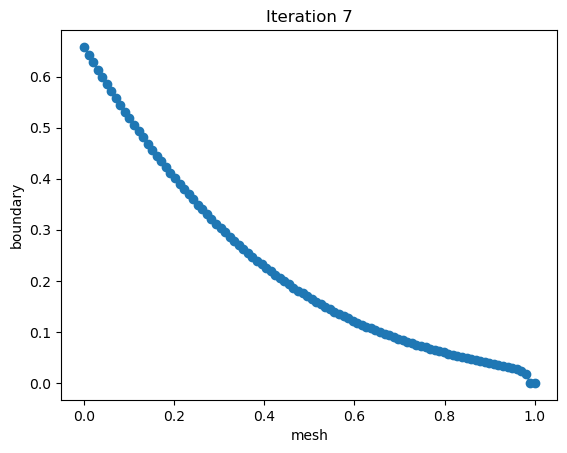

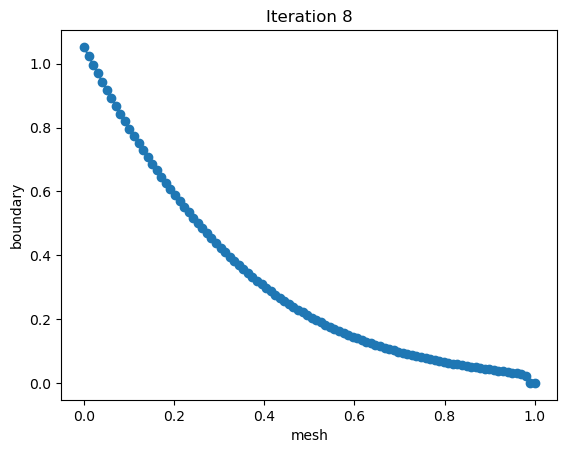

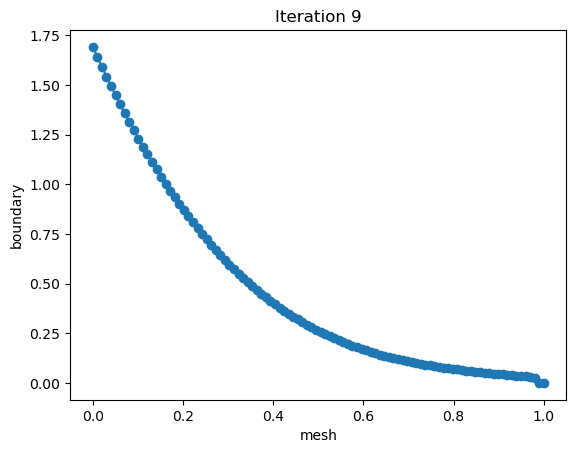

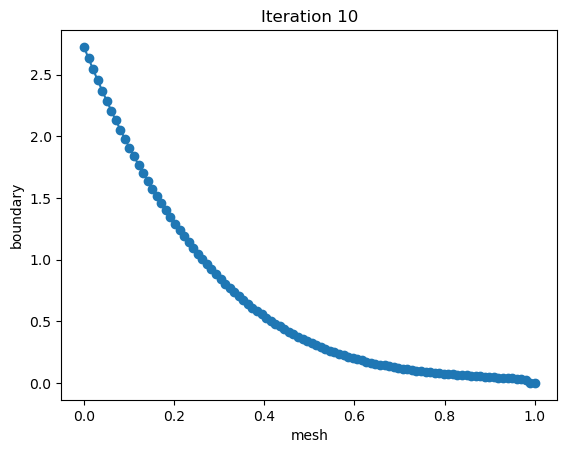

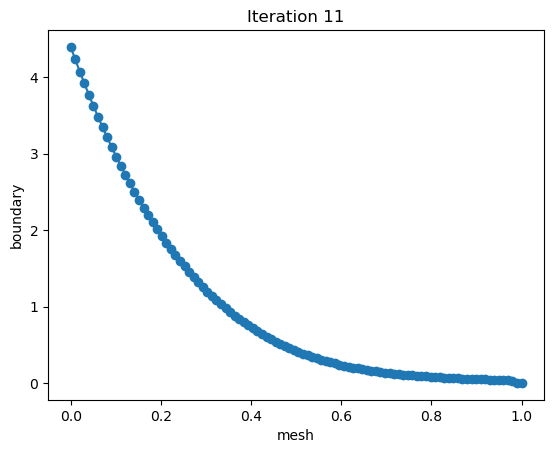

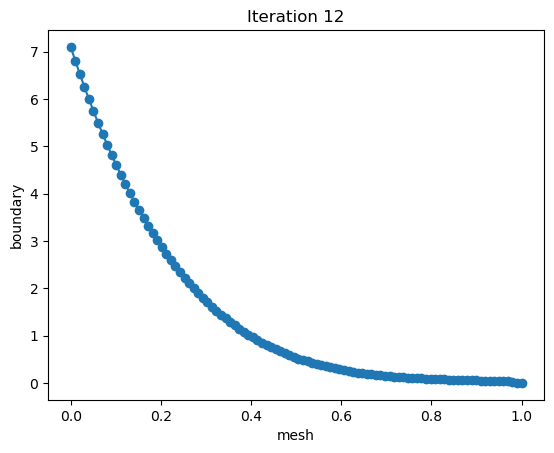

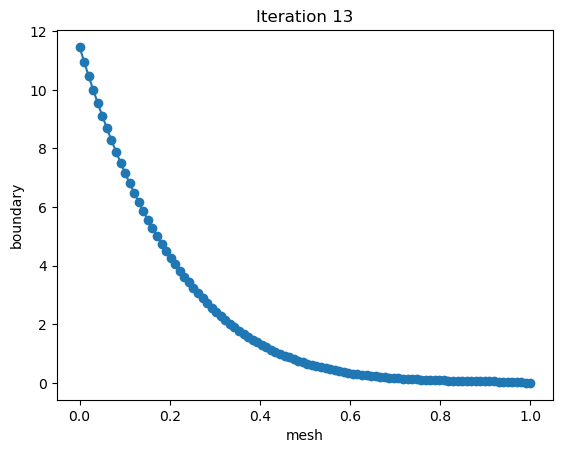

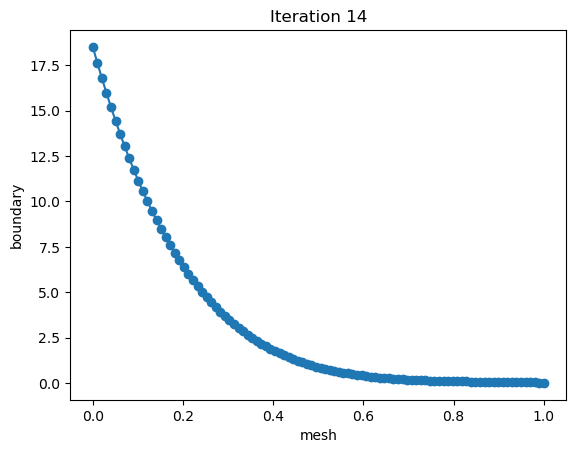

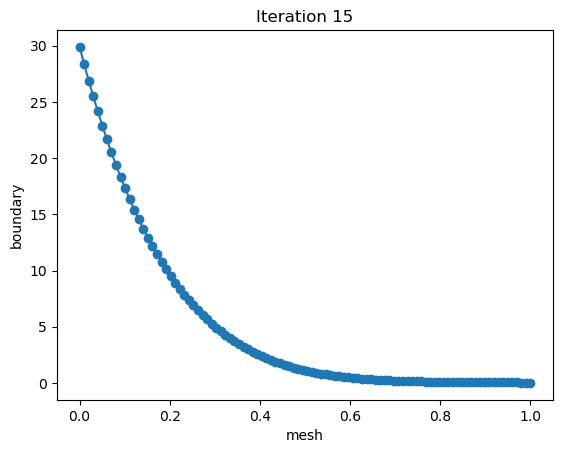

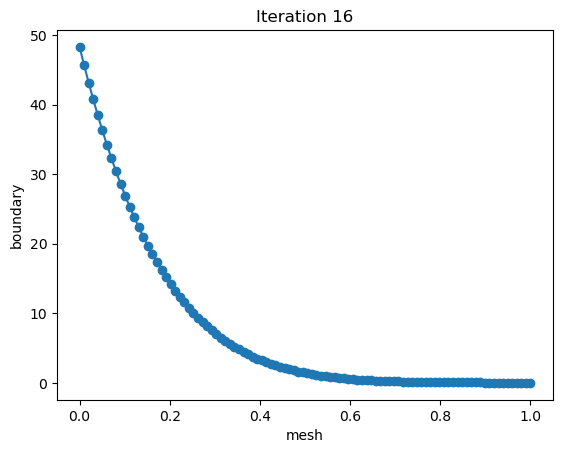

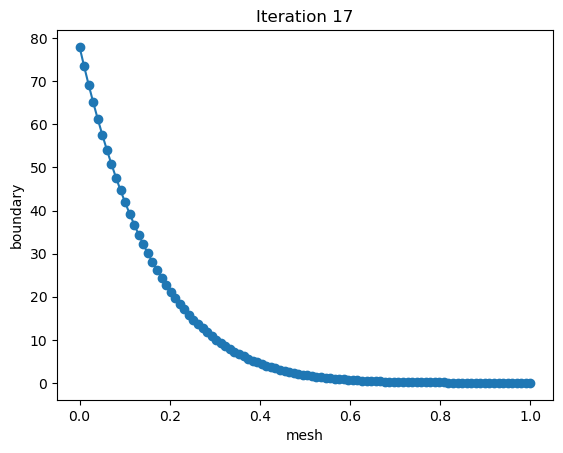

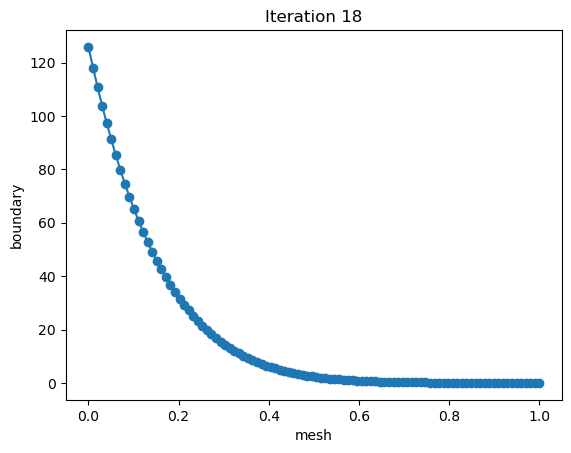

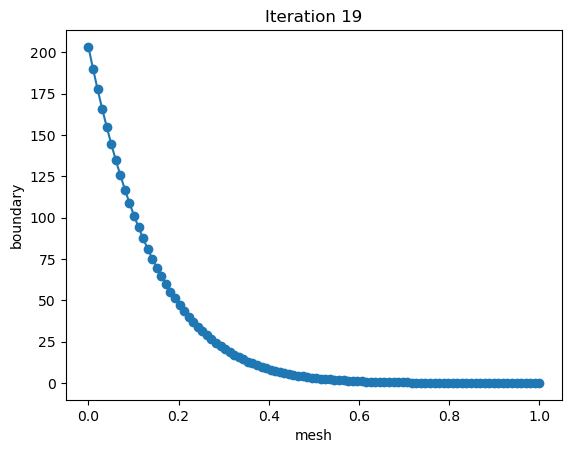

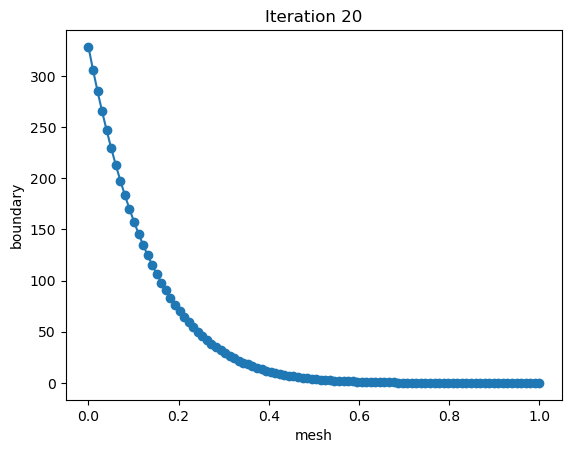

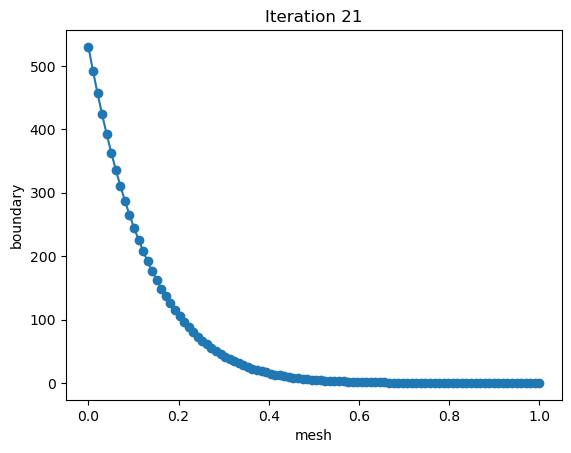

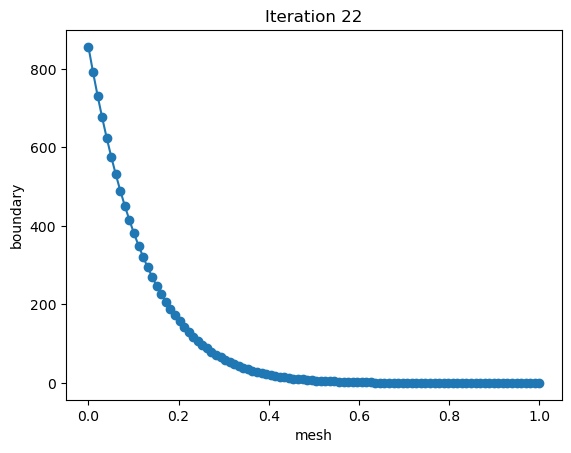

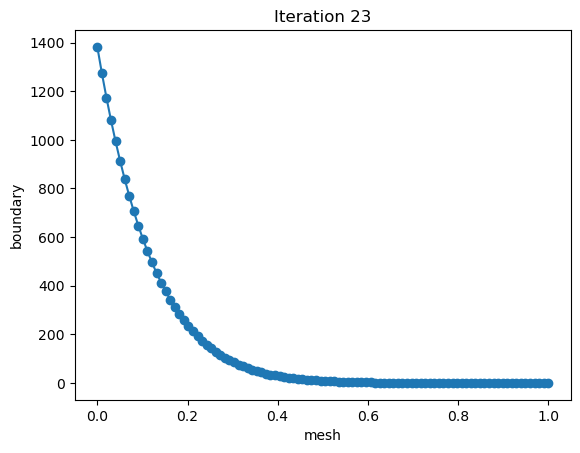

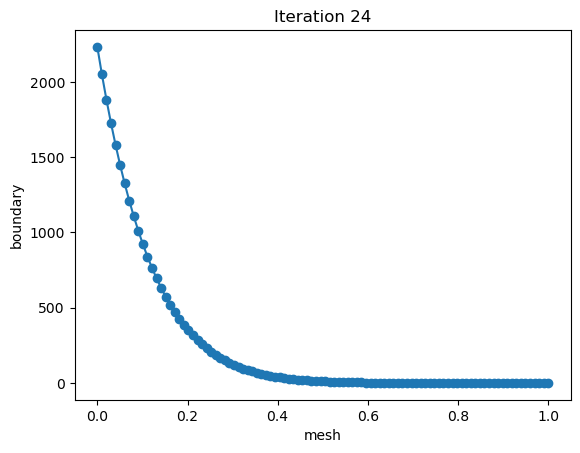

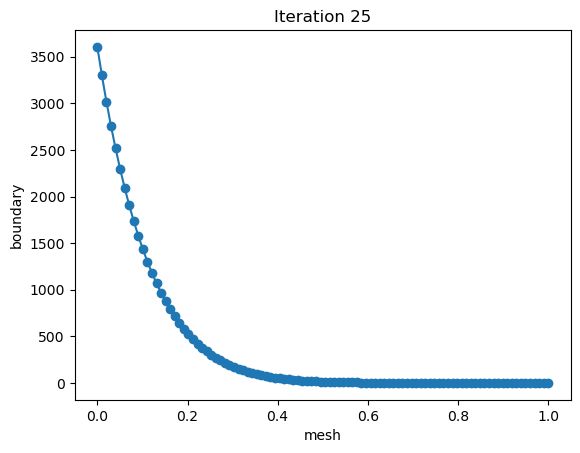

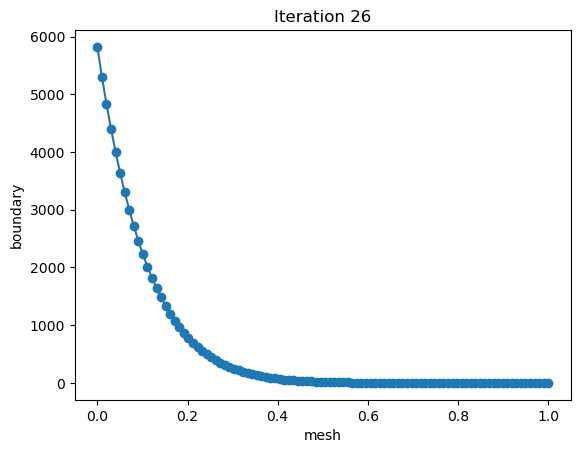

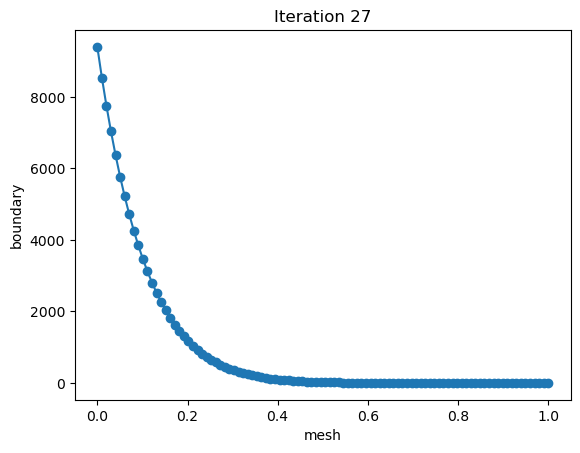

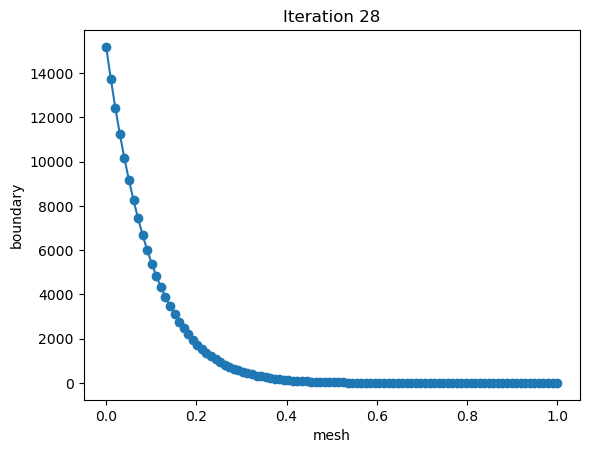

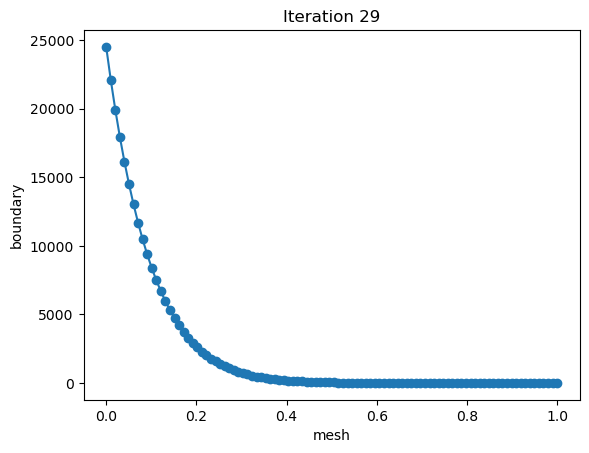

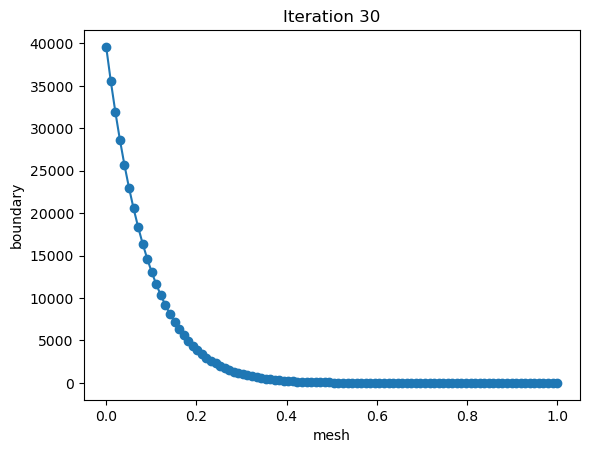

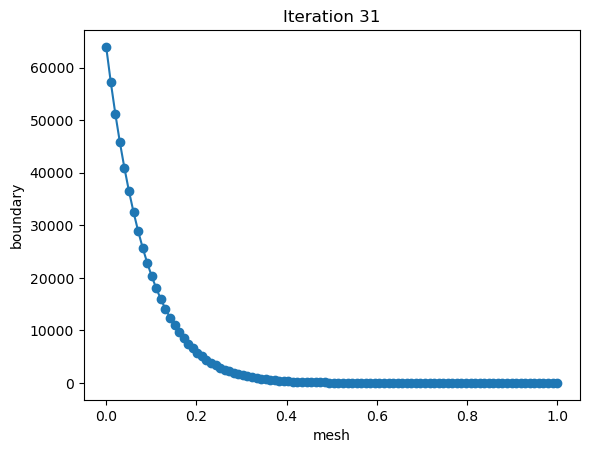

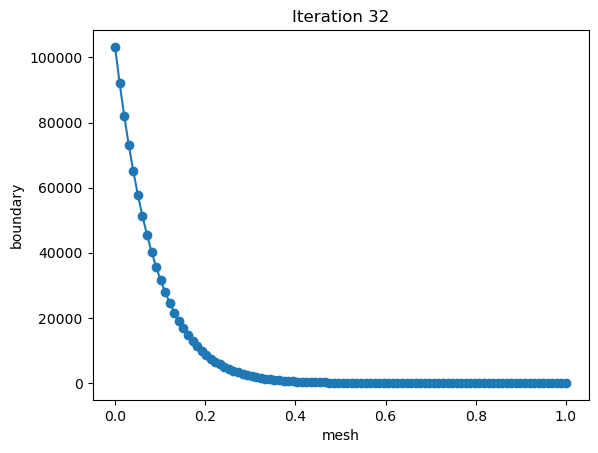

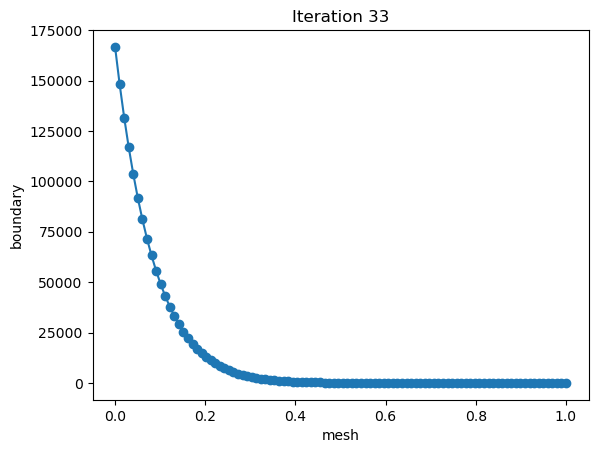

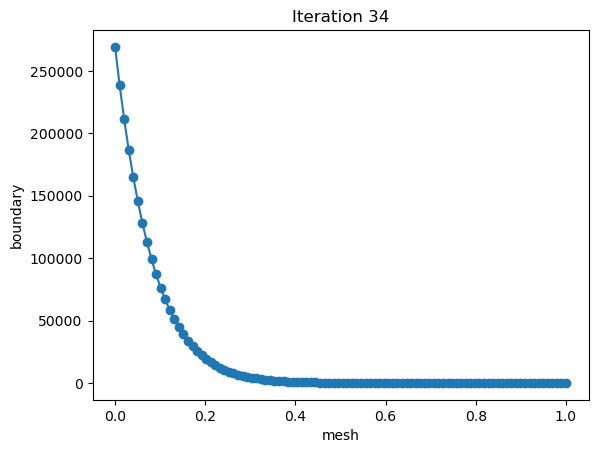

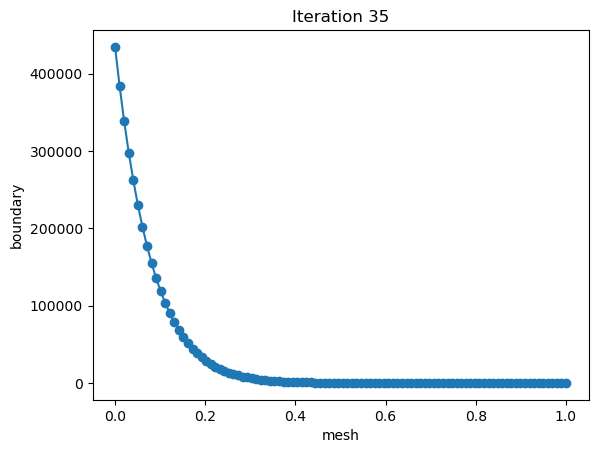

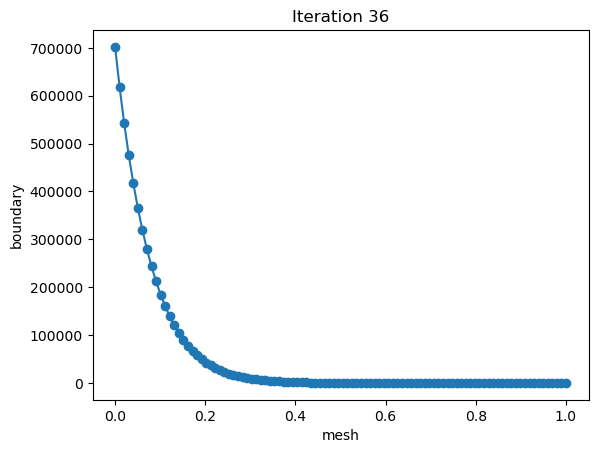

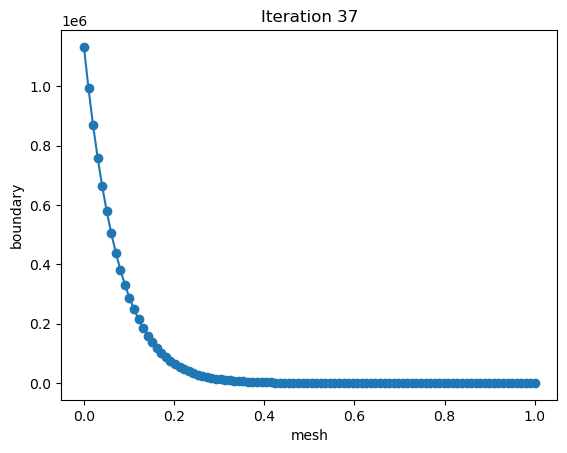

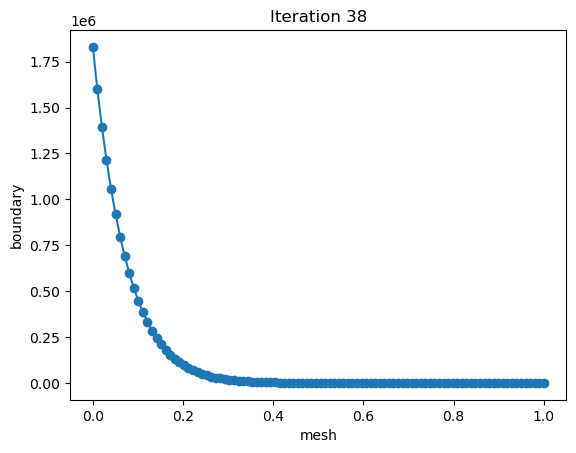

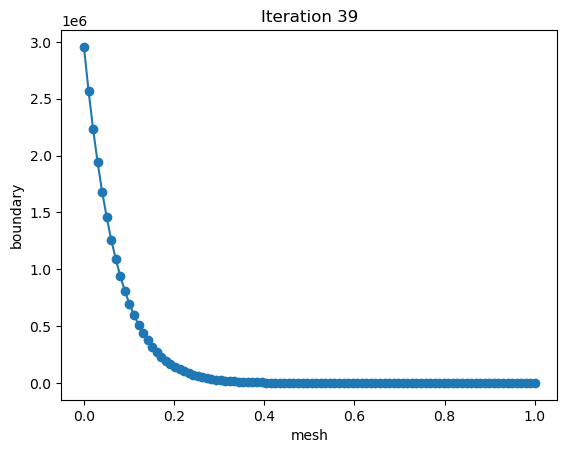

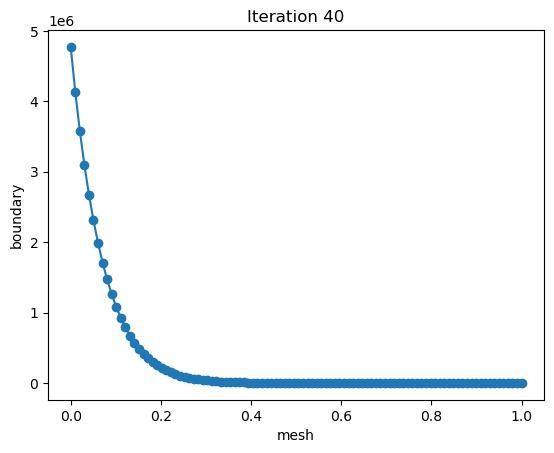

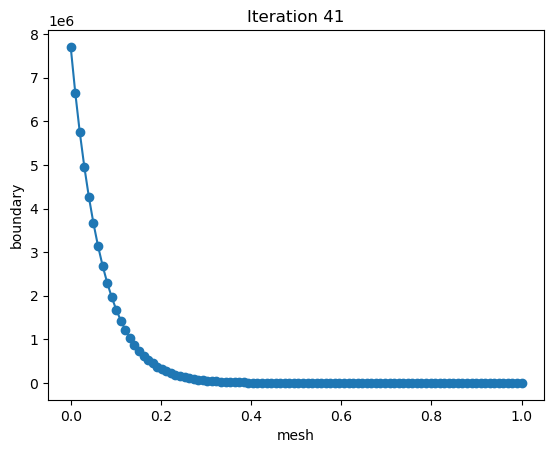

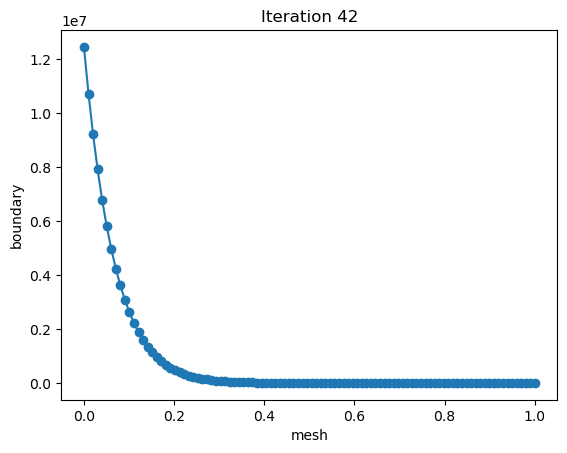

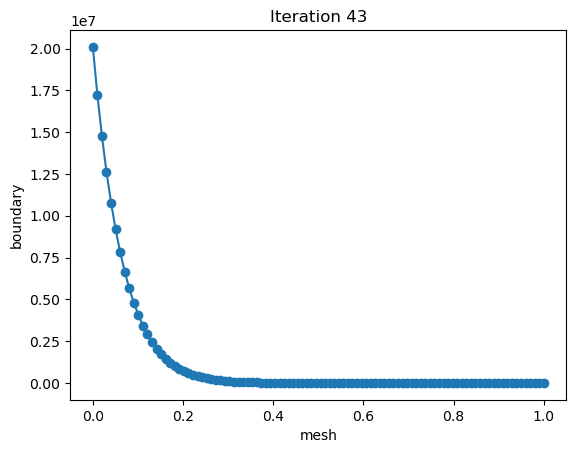

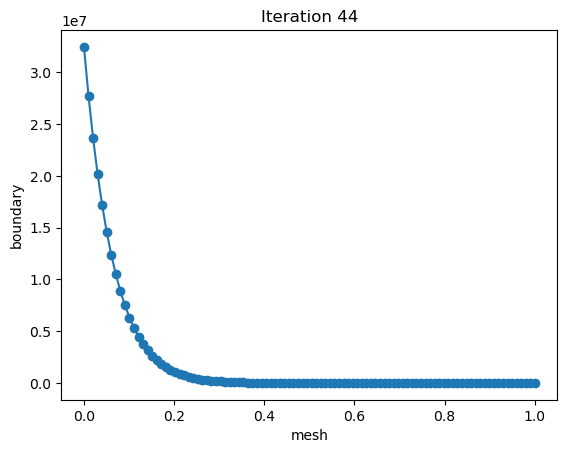

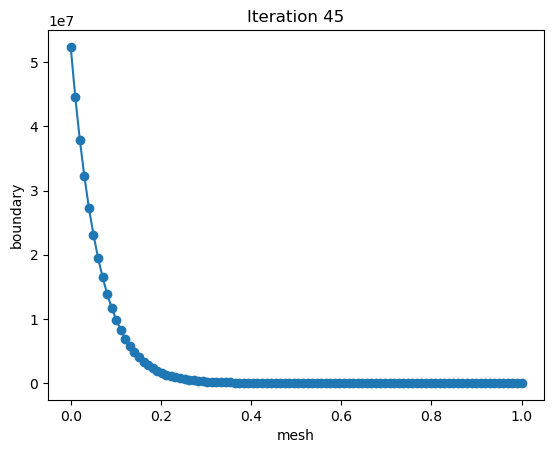

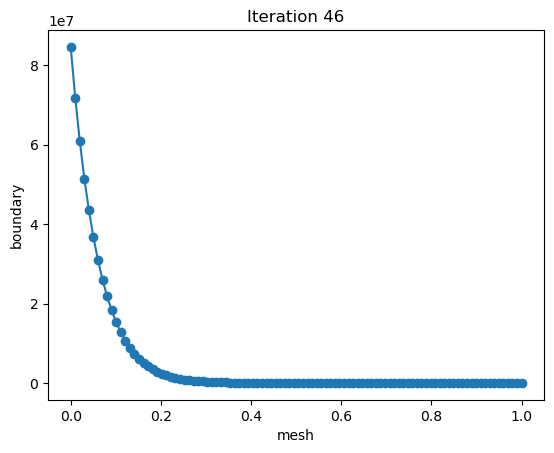

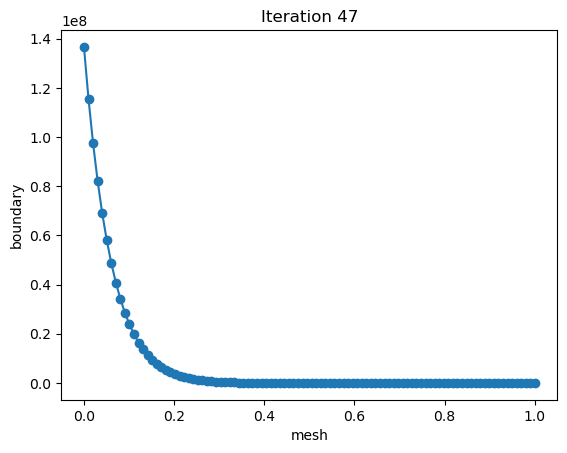

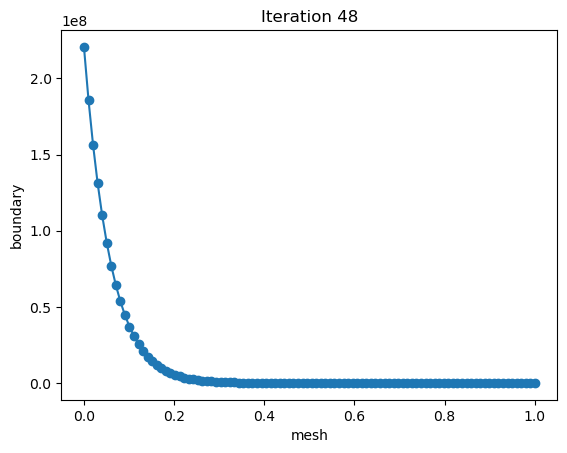

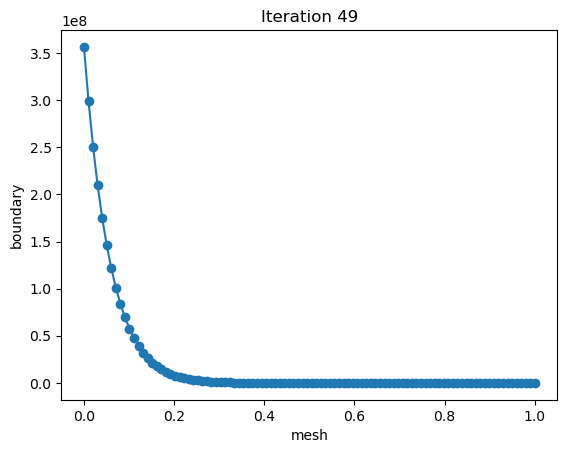

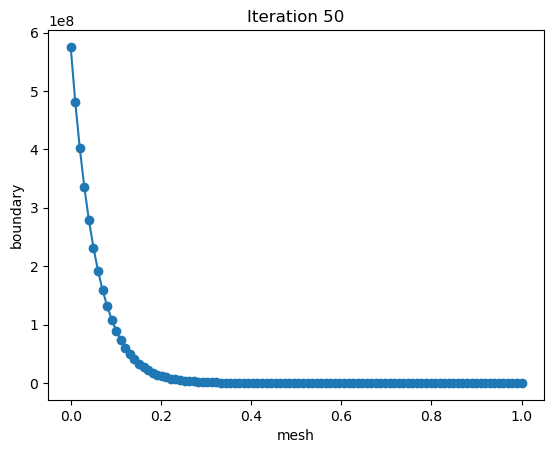

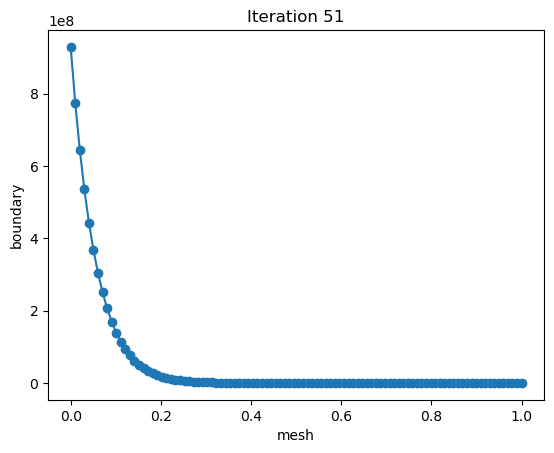

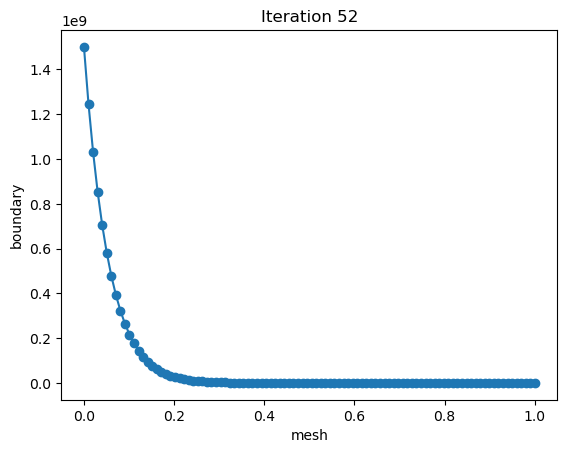

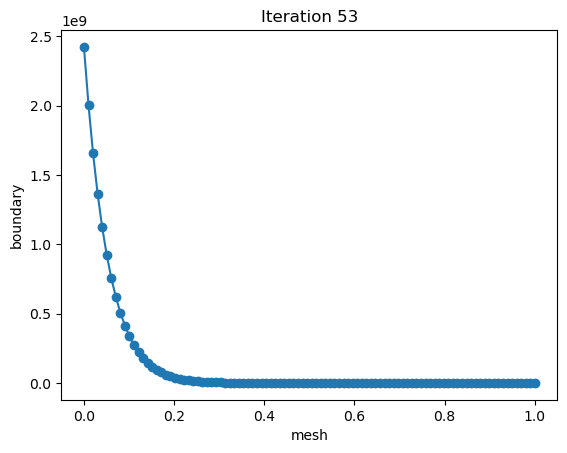

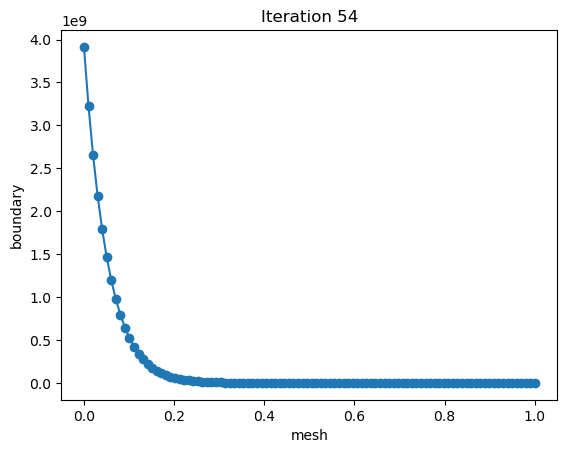

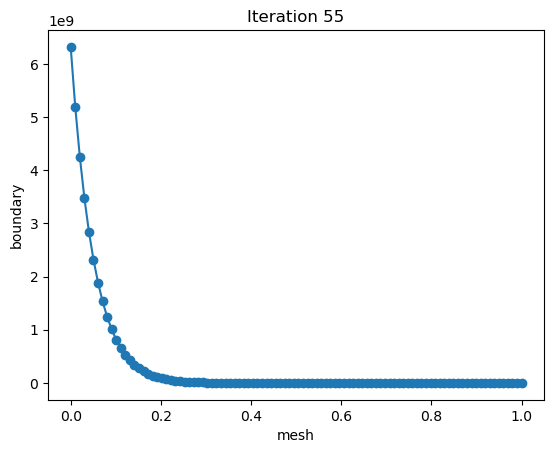

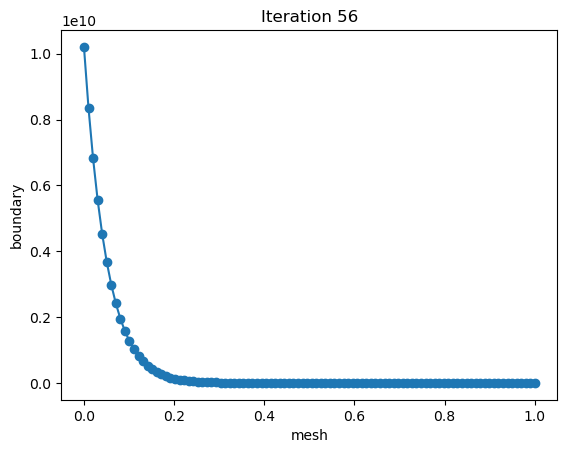

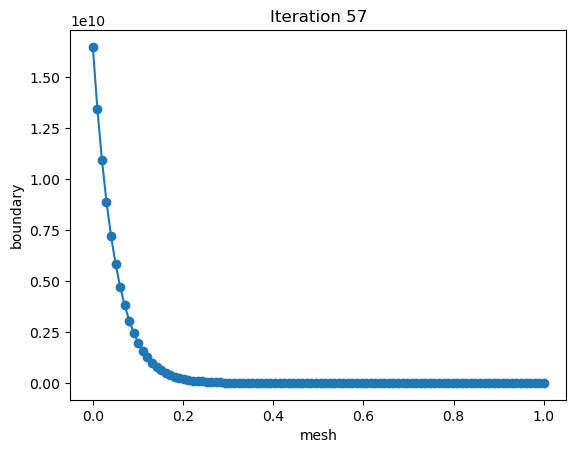

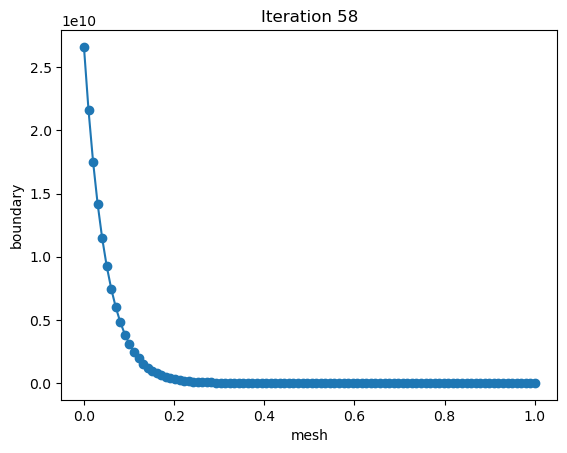

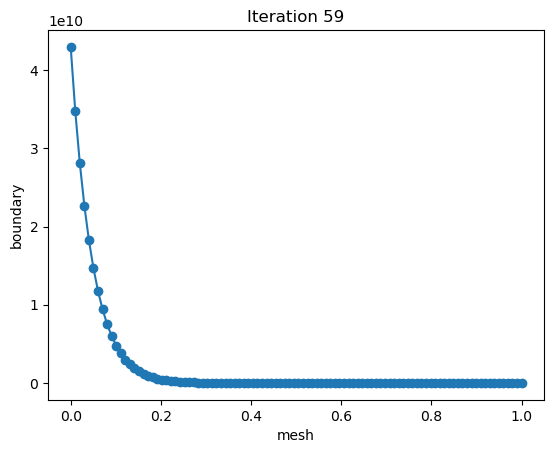

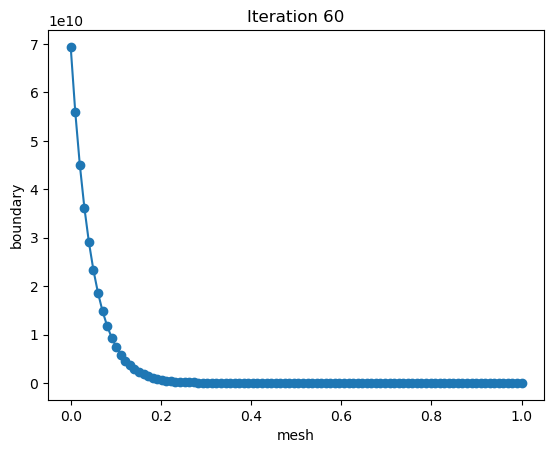

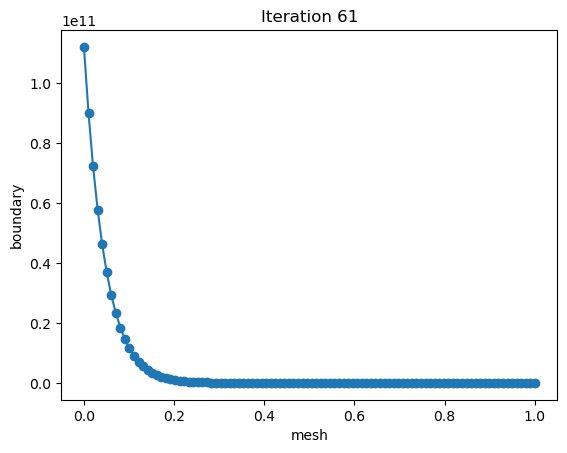

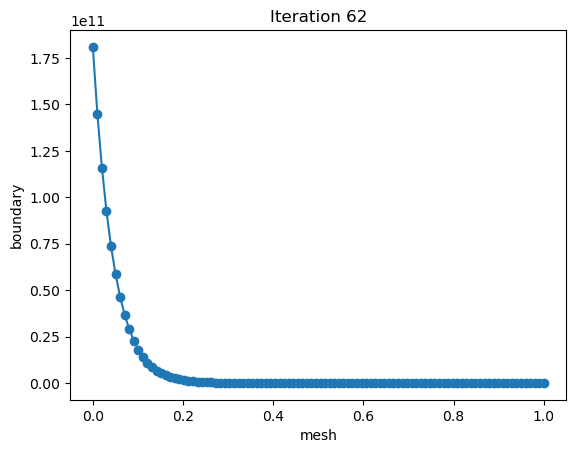

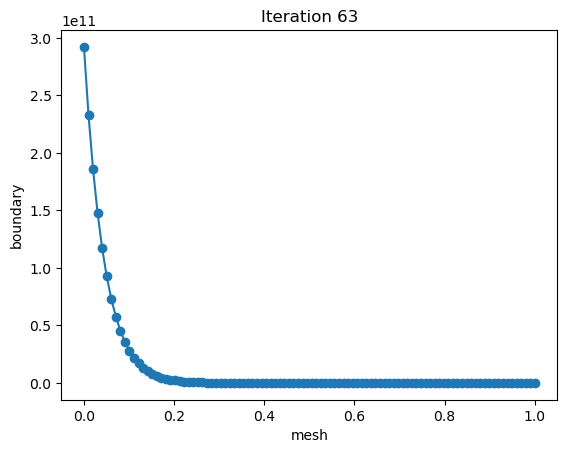

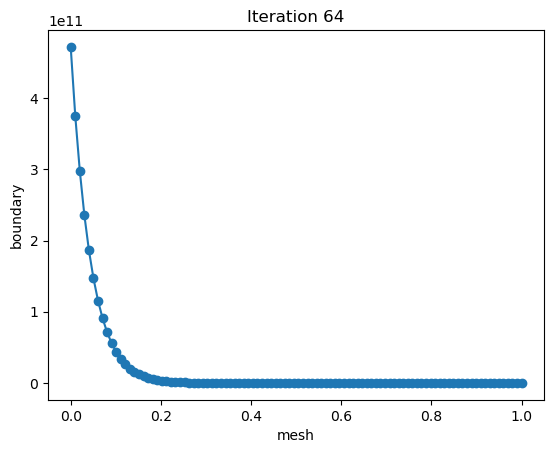

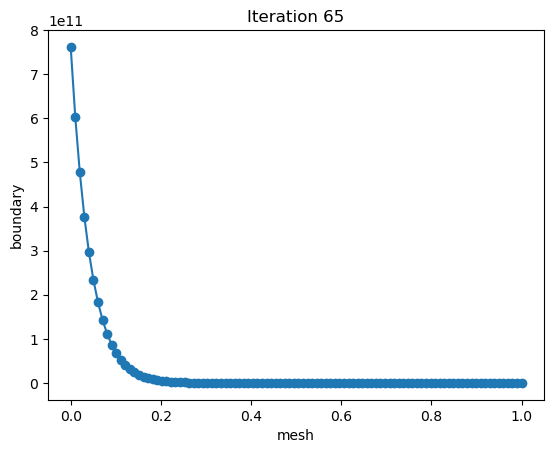

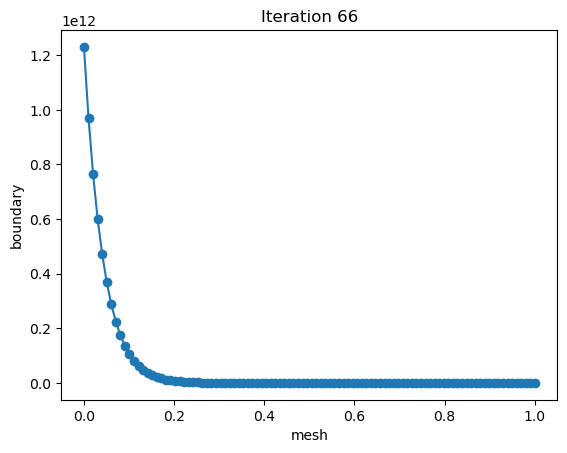

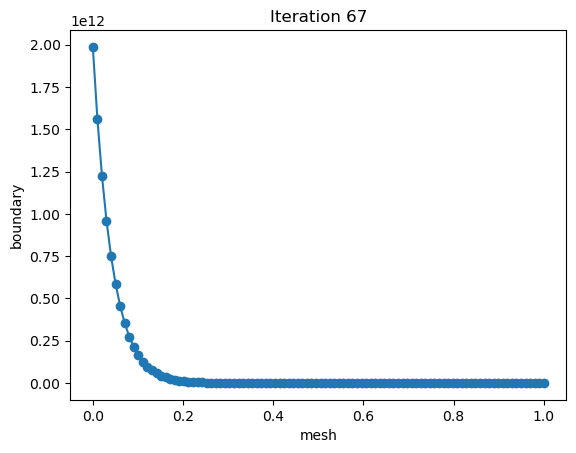

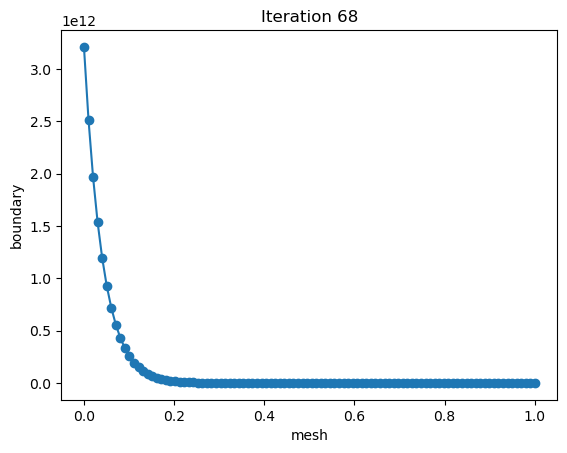

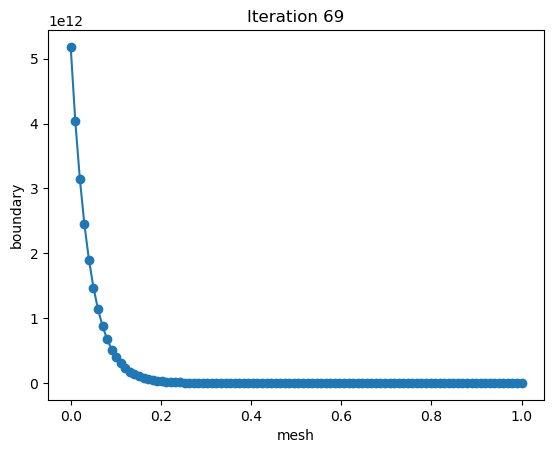

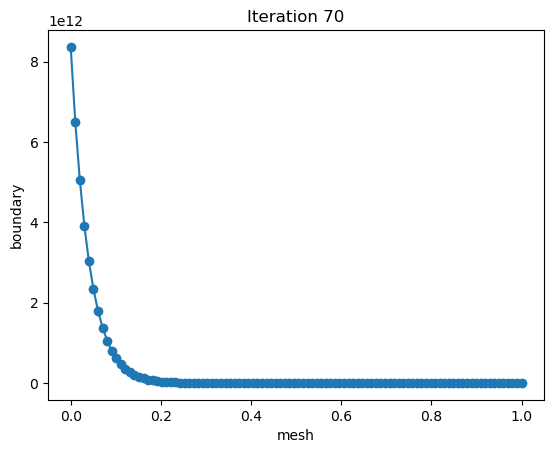

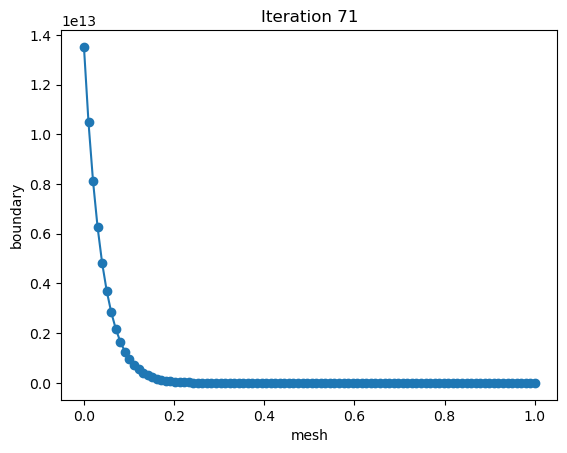

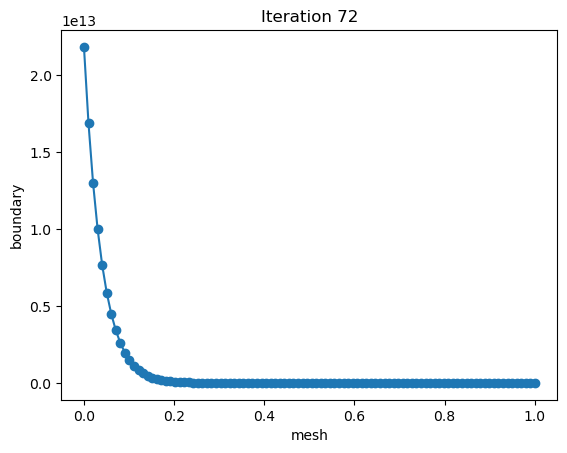

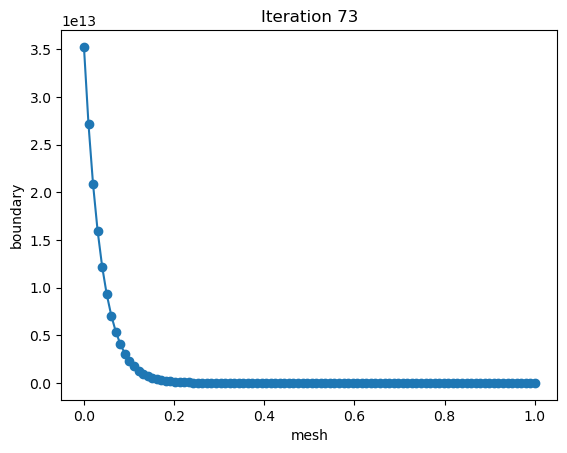

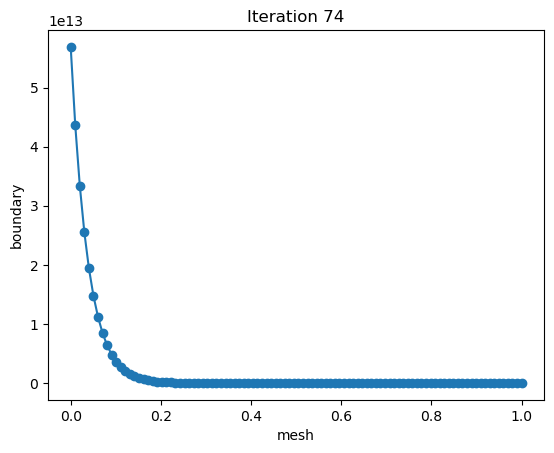

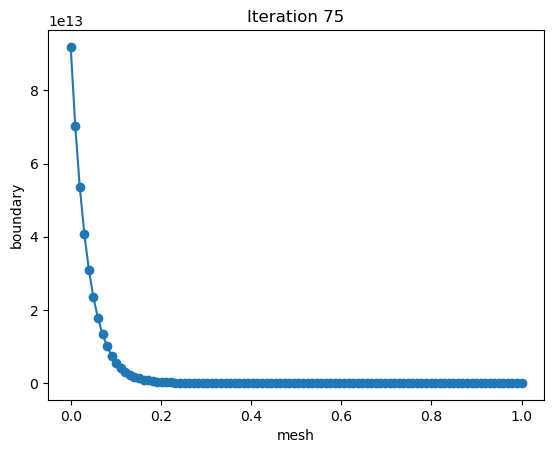

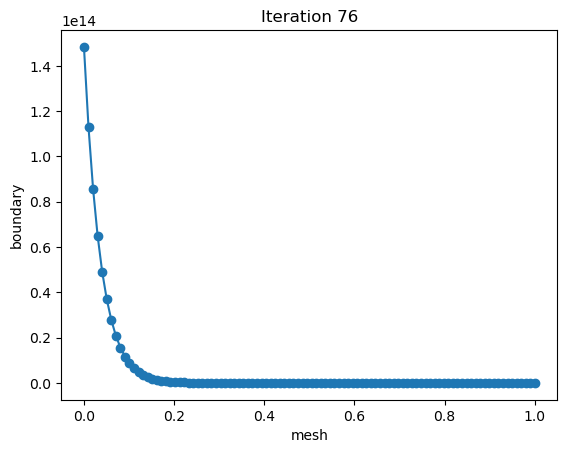

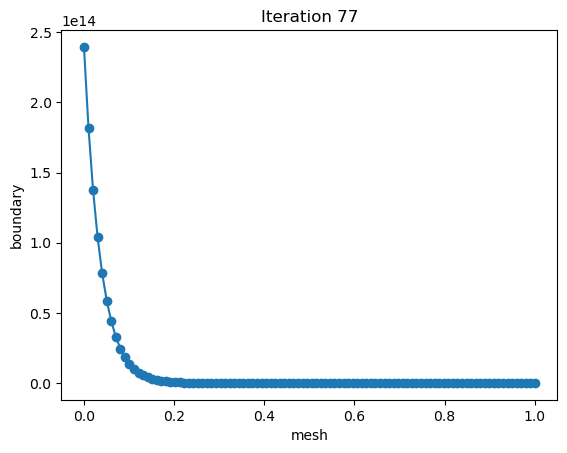

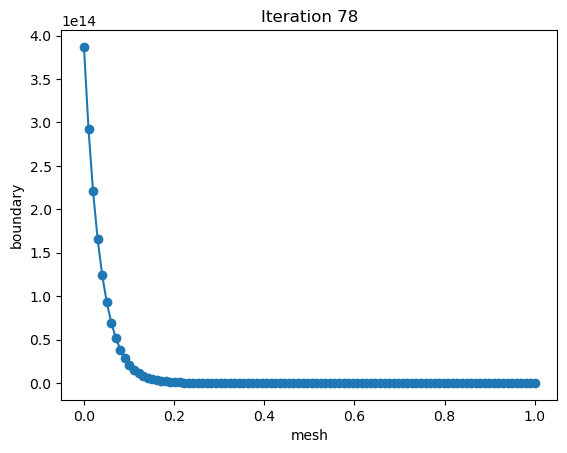

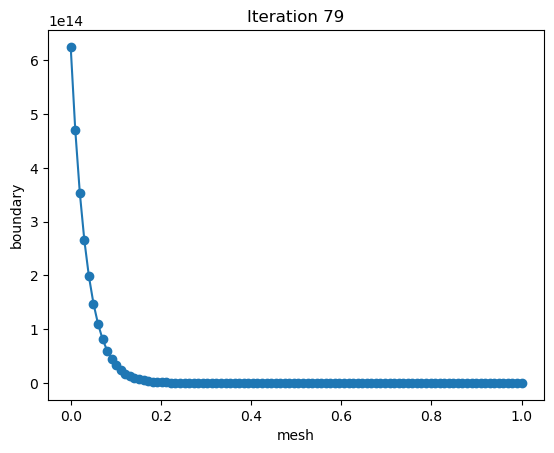

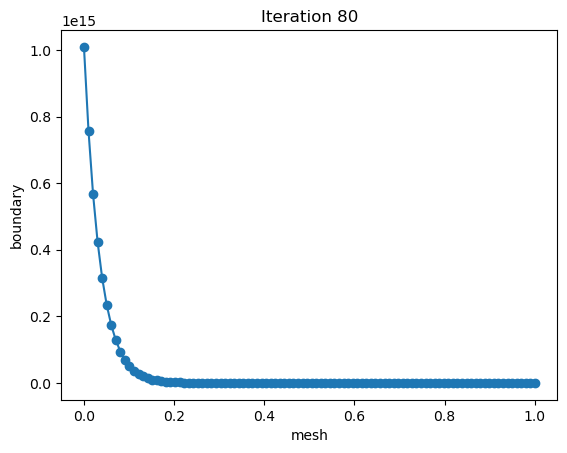

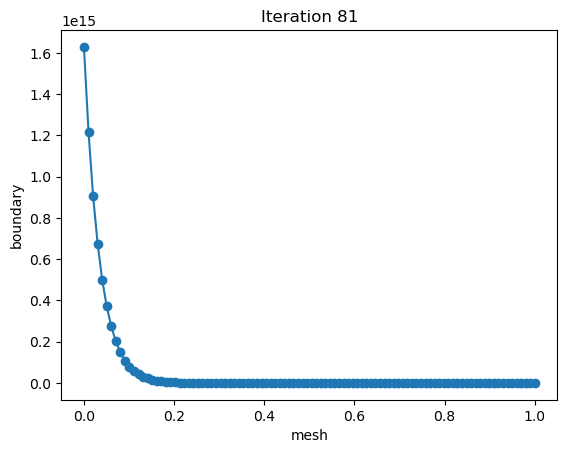

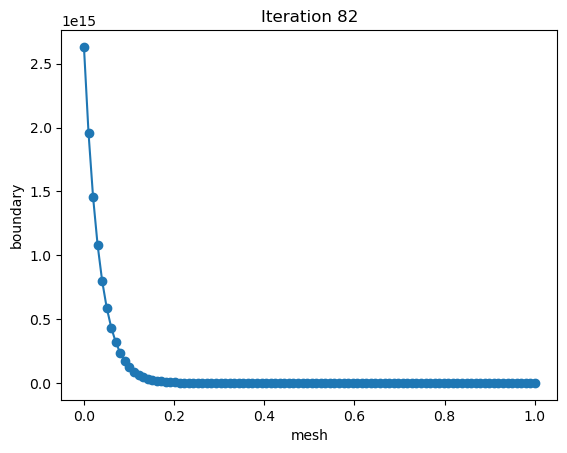

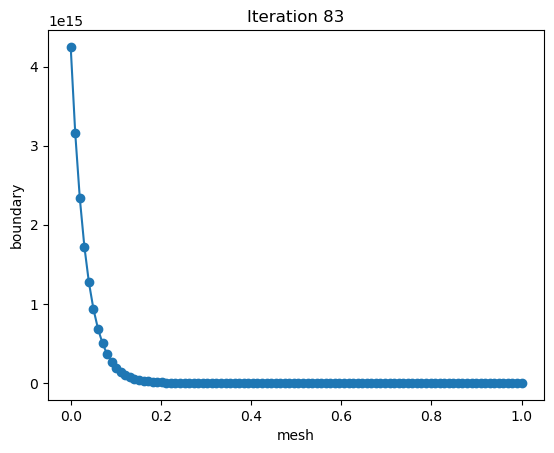

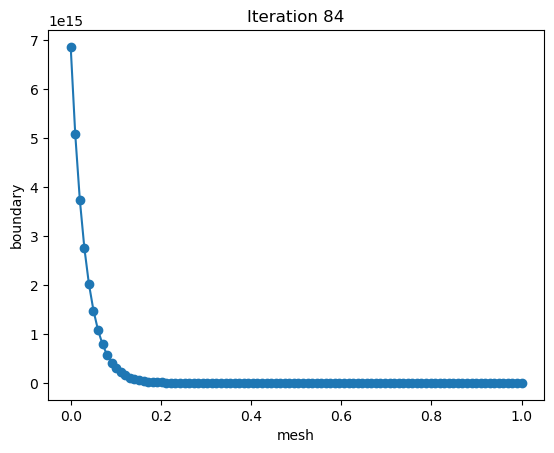

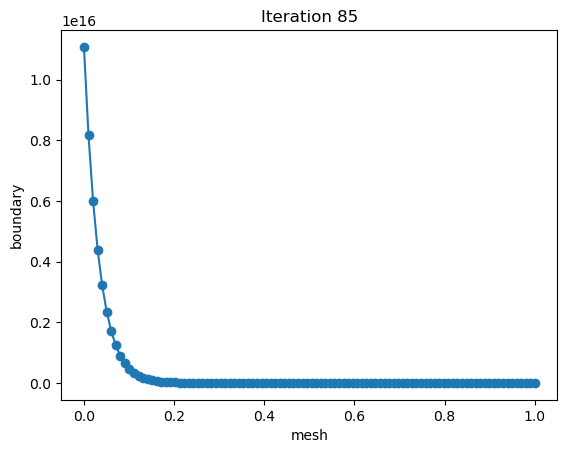

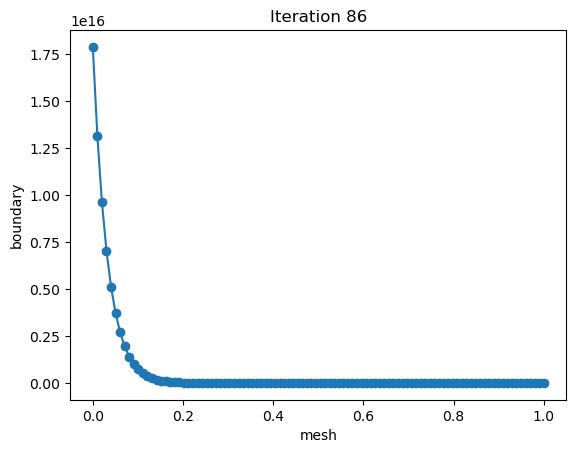

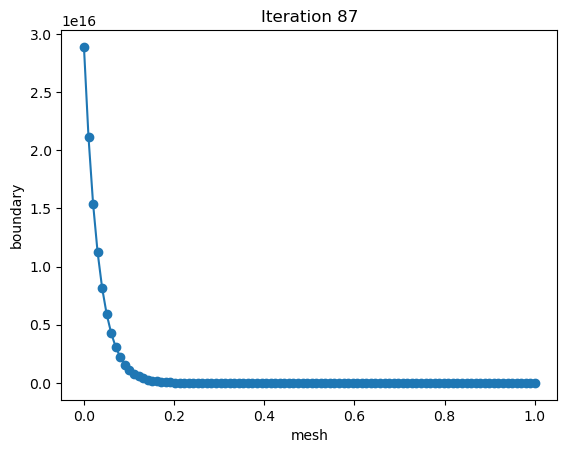

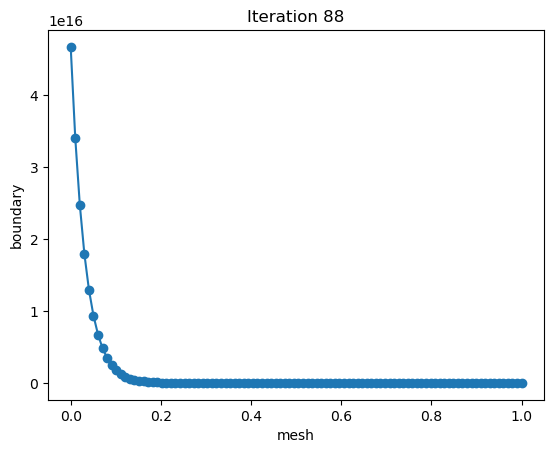

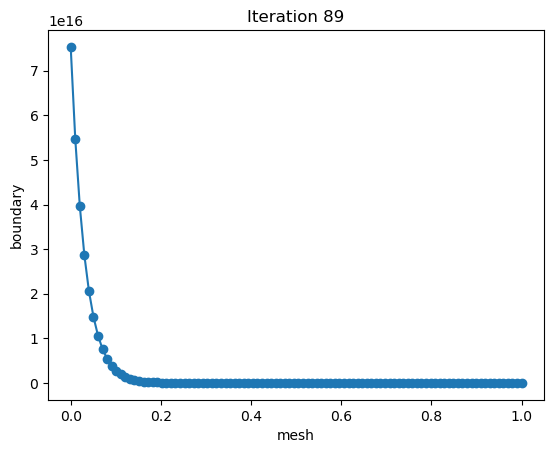

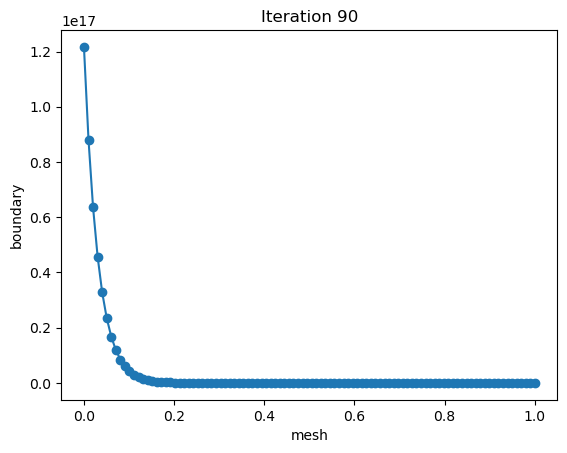

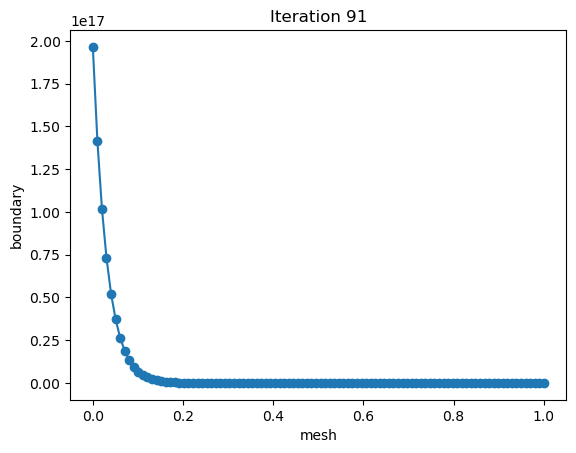

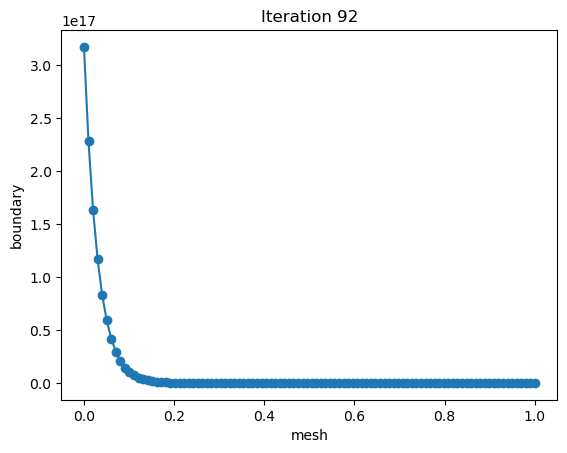

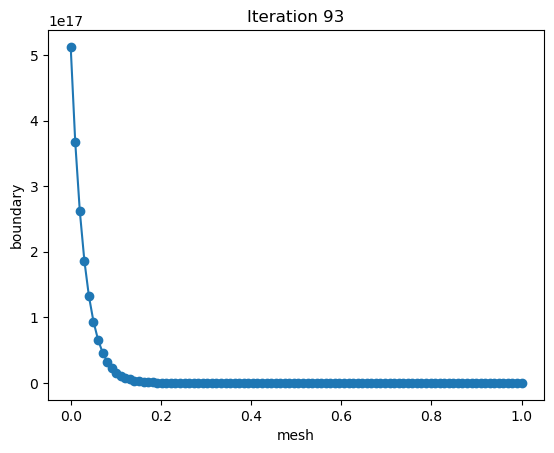

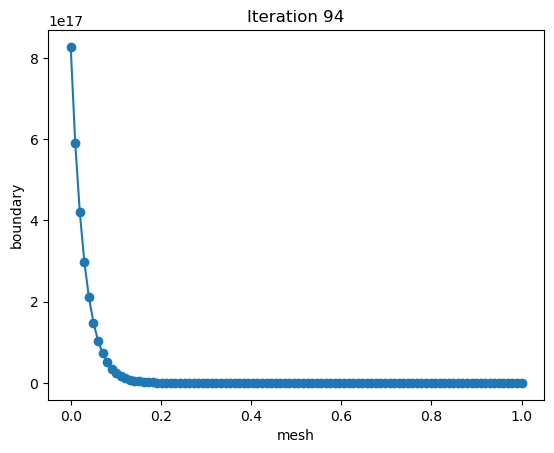

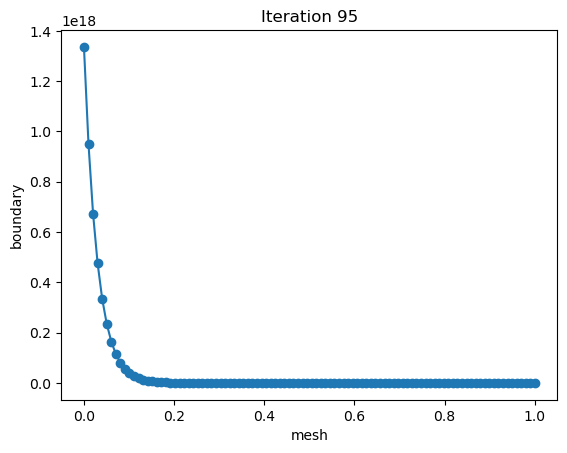

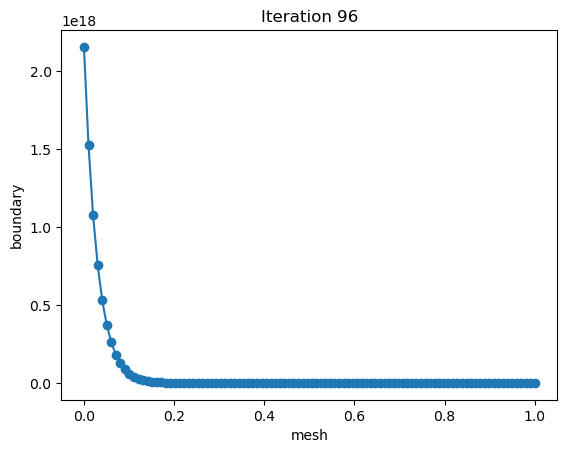

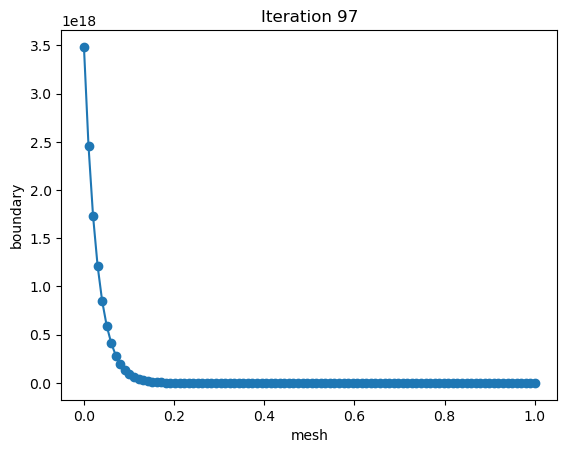

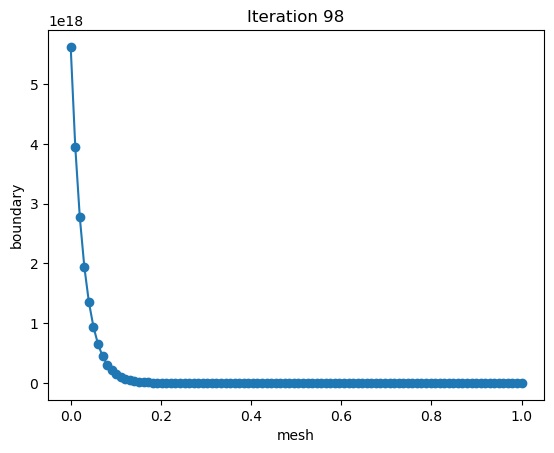

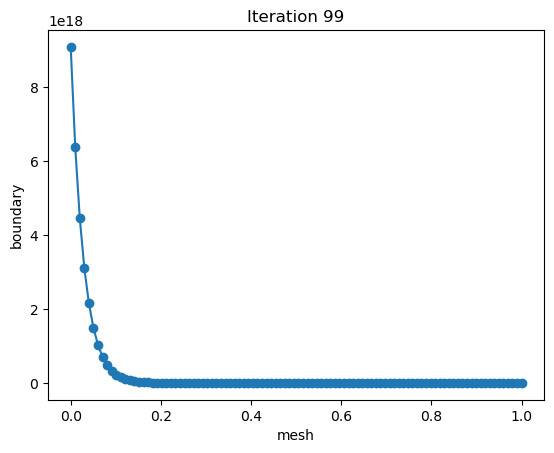

array([1.46714983e+19, 1.02432371e+19, 7.12876251e+18, 4.94521781e+18,
       3.41925055e+18, 2.35629778e+18, 1.61831236e+18, 1.10765954e+18,
       7.55510449e+17, 5.13503055e+17, 3.47769693e+17, 2.34673465e+17,
       1.57774512e+17, 1.05678587e+17, 7.05165023e+16, 4.68731461e+16,
       3.10357766e+16, 2.04682889e+16, 1.34448432e+16, 8.79548403e+15,
       5.73017278e+15, 3.71752143e+15, 2.40154384e+15, 1.54472788e+15,
       9.89260590e+14, 6.30723788e+14, 4.00322234e+14, 2.52926389e+14,
       1.59061172e+14, 9.95614552e+13, 6.20221090e+13, 3.84504194e+13,
       2.37206047e+13, 1.45610029e+13, 8.89341020e+12, 5.40415078e+12,
       3.26692593e+12, 1.96460154e+12, 1.17517848e+12, 6.99195013e+11,
       4.13741621e+11, 2.43482696e+11, 1.42490874e+11, 8.29198833e+10,
       4.79795637e+10, 2.76028548e+10, 1.57879909e+10, 8.97741049e+09,
       5.07462725e+09, 2.85144539e+09, 1.59262874e+09, 8.84169082e+08,
       4.87879251e+08, 2.67567365e+08, 1.45843852e+08, 7.90079865e+07,
      

In [7]:
# t mesh
mesh = 100
t_mesh = np.linspace(0, 1, mesh)

# Boundary
normal_boundary_EDUARDO_step_by_step(mesh = t_mesh, m = 0, gamma = 1/2, tol = 1e-6, max_iter=10)

## Perspectiva Abel

0 1.0
100 0.3684665423053089
200 0.36986345379308505
300 0.37026162071867924
400 0.37041831608089987
500 0.3704874535662398
600 0.3705194755747458
700 0.370534636863706


C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:301: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C


0 1.0
100 0.7421976033528179
200 0.742782982423564


C:\Users\User\Documents\GitHub\Opt-stopp-BB-random-pinning-point\Theoretical_boundaries_visualization_functions.py:45: RuntimeWarning: invalid value encountered in scalar divide
  return numerator / denominator if denominator != 0 else float('inf')


300 nan
400 nan
500 nan


C:\Users\User\Documents\GitHub\Opt-stopp-BB-random-pinning-point\Theoretical_boundaries_visualization_functions.py:84: RuntimeWarning: overflow encountered in multiply
  f_sup = (1/(c2-eval_mesh))*(c3-(means * (1-norm_cdf_sup) + sigmas * norm_pdf_sup))
C:\Users\User\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4979: RuntimeWarning: overflow encountered in add
  ret = (d * (y[tuple(slice1)] + y[tuple(slice2)]) / 2.0).sum(axis)
C:\Users\User\Documents\GitHub\Opt-stopp-BB-random-pinning-point\Theoretical_boundaries_visualization_functions.py:43: RuntimeWarning: invalid value encountered in subtract
  numerator = np.linalg.norm(boundary_new - boundary)
C:\Users\User\Documents\GitHub\Opt-stopp-BB-random-pinning-point\Theoretical_boundaries_visualization_functions.py:80: RuntimeWarning: invalid value encountered in subtract
  norm_cdf_sup = norm.cdf((b_tu - means) / sigmas)
C:\Users\User\Documents\GitHub\Opt-stopp-BB-random-pinning-point\Theoretical_boundaries_visualization_functio

600 nan
700 nan
800 nan
900 nan
0 1.0
100 0.7819827225454831
200 0.7824809979939323
300 nan
400 nan
500 nan
600 nan
700 nan
800 nan
900 nan


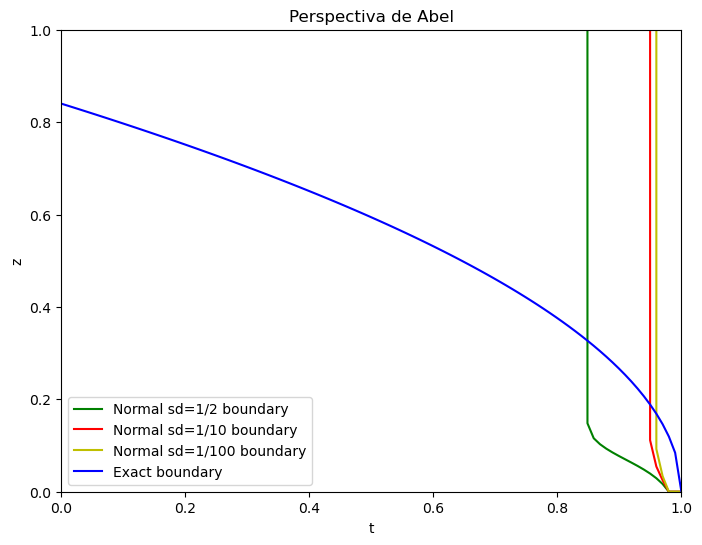

In [8]:
# t mesh
mesh = 100
t_mesh = np.linspace(0, 1, mesh)

# Boundary
normal_boundary_1 = normal_boundary_ABEL(mesh = t_mesh, m = 0, gamma = 1/2, tol = 1e-6)
normal_boundary_2 = normal_boundary_ABEL(mesh = t_mesh, m = 0, gamma = 1/10, tol = 1e-6)
normal_boundary_3 = normal_boundary_ABEL(mesh = t_mesh, m = 0, gamma = 1/100, tol = 1e-6)
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(t_mesh, normal_boundary_1, 'g-', label="Normal sd=1/2 boundary")
plt.plot(t_mesh, normal_boundary_2, 'r-', label="Normal sd=1/10 boundary")
plt.plot(t_mesh, normal_boundary_3, 'y-', label="Normal sd=1/100 boundary")
plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
plt.xlabel("t")
plt.ylabel("z")
plt.title(f"Perspectiva de Abel")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [9]:
# t mesh
mesh = 10
t_mesh = np.linspace(0, 1, mesh)

print(t_mesh[1:-1])

[0.11111111 0.22222222 0.33333333 0.44444444 0.55555556 0.66666667
 0.77777778 0.88888889]


## Perspectiva Eduardo

0 1.0
100 0.36710812639482704
200 0.36851311526620134
300 0.36891162959752855
400 0.36906771086467777
500 0.3691362087918809
600 0.3691677487037892
700 0.36918258885969085
0 1.0
100 0.7421639195459113
200 0.74275513735626
Break at 264 iteration because the error is nan
0 1.0
100 0.7819747528423271
200 0.7824788812403368
Break at 235 iteration because the error is nan


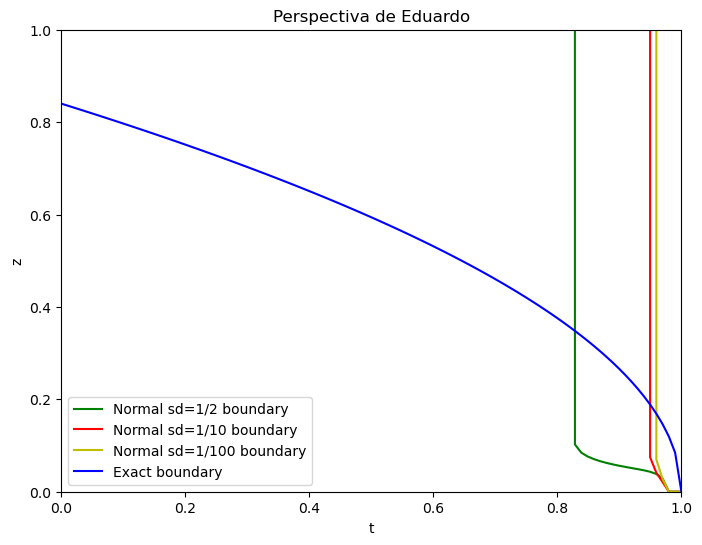

In [10]:
# t mesh
mesh = 100
t_mesh = np.linspace(0, 1, mesh)

# Boundary
normal_boundary_1 = normal_boundary_EDUARDO(mesh = t_mesh, m = 0, gamma = 1/2, tol = 1e-6)
normal_boundary_2 = normal_boundary_EDUARDO(mesh = t_mesh, m = 0, gamma = 1/10, tol = 1e-6)
normal_boundary_3 = normal_boundary_EDUARDO(mesh = t_mesh, m = 0, gamma = 1/100, tol = 1e-6)
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(t_mesh, normal_boundary_1, 'g-', label="Normal sd=1/2 boundary")
plt.plot(t_mesh, normal_boundary_2, 'r-', label="Normal sd=1/10 boundary")
plt.plot(t_mesh, normal_boundary_3, 'y-', label="Normal sd=1/100 boundary")
plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
plt.xlabel("t")
plt.ylabel("z")
plt.title(f"Perspectiva de Eduardo")
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()